#  Analisis Penyajian Data Flight Beberapa Airline di Amerika Serikat

Nama : Ni Luh Ayu Nariswari Dewi

NPM : 23083010068

Kelas : A-083 (Eksplorasi Data Analisis)

Tugas Pertemuan 2


# Deskripsi Dataset

Data yang digunakan merupakan data sekunder yang diambil melalui Website Kaggle terkait data maskapai penerbangan Amerika serikat pada tahun 2013 yang diekstraksi oleh Farzad Nekouei. Data ini memberikan informasi terkait rute penerbangan, jadwal keberangkatan dan kedatangan, maskapai yang digunakan, serta informasi lainnya yang dapat digunakan untuk menganalisis data terkait penundaan dan kinerja maskapai penerbangan. Lebih lanjut, analisis ini dapat dimanfaatkan sebagai evaluasi maskapai penerbangan untuk mengoptimalkan pelayanan dan meningkatkan pengalaman pengguna. Data tersebut juga dapat digunakan untuk mempelajari tren pasar dalam mengembangkan strategi penjualan dalam industri penerbangan. Data ini terdiri dari beberapa variabel-variabel, yakni sebagai berikut : 

1. id (continuous > data unik sebagai identitas dari penumpang)
2. year (2013 > tahun berlangsungnya penerbangan yaitu tahun 2013)
3. month (1-12 > bulan berlangsungnya penerbangan yang mencangkup bulan Januari (1) hingga Desember (12))
4. day (1-31 > hari berlangsungnya penerbangan)
5. dep_time (continuous > waktu jadwal keberangkatan secara real time)
6. sched_dep_time (continuous > waktu jadwal keberangkatan)
7. dep_delay (continuous > penundaan keberangkatan penerbangan)
8. arr_time (continuous > waktu kedatangan secara real time)
9. sched_arr_time (continuous > waktu jadwal kedatangan)
10. arr_delay ( continuous > keterlambambatan kedatangan penerbangan)
11. carrier (UA, B6, EV, DL, AA, MQ, US, 9E, WN, VX, FL, AS, F9, YV, HA, OO > kode huruf maskapai penerbangan)
12. flight (continuous > nomor penerbangan)
13. tailnum (continuous > nomor pesawat)
14. origin (EWR, JFK, LGA > kode huruf bandara keberangkatan)
15. dest (continuous > kode huruf bandara kedatangan)
16. air_time (continuous > durasi penerbangan)
17. distance (continuous > total jarak penerbangan)
18. hour (1-24 > jam keberangkatan yang dijadwalkan)
19. minute (1-60 > menit keberangkatan yang dijadwalkan)
20. time_hour (continuous > waktu keberangkatan penerbangan yang dijadwalkan)
21. name (United Air Lines Inc., JetBlue Airways, ExpressJet Airlines Inc., Delta Air Lines Inc., American Airlines Inc., Envoy Air, US Airways Inc., Endeavor Air Inc., Southwest Airlines Co., Virgin America, AirTran Airways Corporation, Alaska Airlines Inc., Frontier Airlines Inc., Mesa Airlines Inc., Hawaiian Airlines Inc., SkyWest Airlines Inc.> nama maskapai penerbangan)



## Melakukan Import Library yang Digunakan Untuk Analisis Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline
%pylab inline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, \
                        AdaBoostClassifier, GradientBoostingClassifier
pylab.rcParams['figure.figsize'] = (10, 7)

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Memanggil dan Membaca Dataset 

In [2]:
dataset = pd.read_csv('C:\\Users\\Nariswari\\Downloads\\flights.csv\\flights.csv')
dataset.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  int64  
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        328521 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       328521 non-null  float64
 7   arr_time        328063 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       327346 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  int64  
 12  tailnum         334264 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        327346 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [4]:
dataset['id'] = dataset['id'].astype(str)
dataset['flight'] = dataset['flight'].astype(str)

In [5]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
year,336776.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
month,336776.0,6.548510,3.414457,1.0,4.0,7.0,10.0,12.0
day,336776.0,15.710787,8.768607,1.0,8.0,16.0,23.0,31.0
dep_time,328521.0,1349.109947,488.281791,1.0,907.0,1401.0,1744.0,2400.0
sched_dep_time,336776.0,1344.254840,467.335756,106.0,906.0,1359.0,1729.0,2359.0
dep_delay,328521.0,12.639070,40.210061,-43.0,-5.0,-2.0,11.0,1301.0
arr_time,328063.0,1502.054999,533.264132,1.0,1104.0,1535.0,1940.0,2400.0
sched_arr_time,336776.0,1536.380220,497.457142,1.0,1124.0,1556.0,1945.0,2359.0
arr_delay,327346.0,6.895377,44.633292,-86.0,-17.0,-5.0,14.0,1272.0
air_time,327346.0,150.686460,93.688305,20.0,82.0,129.0,192.0,695.0


In [6]:
dataset.describe(include = 'object')

,id,carrier,flight,tailnum,origin,dest,time_hour,name
count,336776,336776,336776,334264,336776,336776,336776,336776
unique,336776,16,3844,4043,3,105,6936,16
top,0,UA,15,N725MQ,EWR,ORD,2013-09-13 08:00:00,United Air Lines Inc.
freq,1,58665,968,575,120835,17283,94,58665


In [7]:
dataset['name'].value_counts()

United Air Lines Inc.          58665
JetBlue Airways                54635
ExpressJet Airlines Inc.       54173
Delta Air Lines Inc.           48110
American Airlines Inc.         32729
Envoy Air                      26397
US Airways Inc.                20536
Endeavor Air Inc.              18460
Southwest Airlines Co.         12275
Virgin America                  5162
AirTran Airways Corporation     3260
Alaska Airlines Inc.             714
Frontier Airlines Inc.           685
Mesa Airlines Inc.               601
Hawaiian Airlines Inc.           342
SkyWest Airlines Inc.             32
Name: name, dtype: int64

Berdasarkan proses pemanggilan dan pembacaan data, dapat disimpulkan beberapa hal :
1. Dataset memiliki entries sebanyak 336,776 dan 21 kolom
2. Tipe-tipe data yang terdapat pada dataset adalah interger, float, dan object (kategori)
3. Terdapat beberapa missing values di dalam dataset, seperti pada variabel dep_time, dep_delay, arr_time, arr_delay, tailnum, dan air_time.
4. Dataset ini merupakan penerbangan pada tahun 2013 dengan variasi bulan, hari, jam, dan menit. Pada penerbangan terdapat waktu yang dijadwalkan hingga penundaan dan keterlambatan. Durasi penerbangan pada dataset berkisar 20 hingga 695 menit dengan total jarak berkisar 17 hingga 4983 mil.
5. Selanjutnya pada data object terdapat id dan flight sebagai kode unik penumpang dan penerbangan. Terdapat 16 kode dan nama dari maskapai penerbangan dalam data. 

## Proses Preprocessing Data

### Mencari dan Mengatasi Missing Value

In [8]:
np.sum(dataset.isnull())

id                   0
year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
flight               0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
time_hour            0
name                 0
dtype: int64

In [9]:
dataset['dep_time'].fillna(0, inplace=True)
dataset['dep_delay'].fillna(0, inplace=True)
dataset['arr_time'].fillna(0, inplace=True)
dataset['arr_delay'].fillna(0, inplace=True)
dataset['tailnum'].fillna("Unknown", inplace=True)
dataset['air_time'].fillna(0, inplace=True)

In [10]:
np.sum(dataset.isnull())

id                0
year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
flight            0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
time_hour         0
name              0
dtype: int64

In [11]:
datacopy = dataset.copy()

## Melakukan Proses Pengecekan Data Untuk Mengetahui Sudah Tidak Ada Missing Values

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              336776 non-null  object 
 1   year            336776 non-null  int64  
 2   month           336776 non-null  int64  
 3   day             336776 non-null  int64  
 4   dep_time        336776 non-null  float64
 5   sched_dep_time  336776 non-null  int64  
 6   dep_delay       336776 non-null  float64
 7   arr_time        336776 non-null  float64
 8   sched_arr_time  336776 non-null  int64  
 9   arr_delay       336776 non-null  float64
 10  carrier         336776 non-null  object 
 11  flight          336776 non-null  object 
 12  tailnum         336776 non-null  object 
 13  origin          336776 non-null  object 
 14  dest            336776 non-null  object 
 15  air_time        336776 non-null  float64
 16  distance        336776 non-null  int64  
 17  hour      

In [13]:
dataset.head()

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


In [14]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
year,336776.0,2013.000000,0.000000,2013.0,2013.0,2013.0,2013.0,2013.0
month,336776.0,6.548510,3.414457,1.0,4.0,7.0,10.0,12.0
day,336776.0,15.710787,8.768607,1.0,8.0,16.0,23.0,31.0
dep_time,336776.0,1316.040778,525.447907,0.0,854.0,1349.0,1737.0,2400.0
sched_dep_time,336776.0,1344.254840,467.335756,106.0,906.0,1359.0,1729.0,2359.0
dep_delay,336776.0,12.329263,39.762251,-43.0,-5.0,-1.0,10.0,1301.0
arr_time,336776.0,1463.194138,577.818818,0.0,1047.0,1518.0,1934.0,2400.0
sched_arr_time,336776.0,1536.380220,497.457142,1.0,1124.0,1556.0,1945.0,2359.0
arr_delay,336776.0,6.702301,44.018670,-86.0,-16.0,-4.0,13.0,1272.0
air_time,336776.0,146.467118,95.654155,0.0,78.0,126.0,188.0,695.0


In [15]:
dataset.describe(include = 'object')

,id,carrier,flight,tailnum,origin,dest,time_hour,name
count,336776,336776,336776,336776,336776,336776,336776,336776
unique,336776,16,3844,4044,3,105,6936,16
top,0,UA,15,Unknown,EWR,ORD,2013-09-13 08:00:00,United Air Lines Inc.
freq,1,58665,968,2512,120835,17283,94,58665


Karena terdapat missing value pada data, maka dilakukan proses imputasi atau pengisian pada kolom yang terdapat missing values agar dataset tidak memiliki missing values dan proses analisis tidak terganggu oleh informasi yang tidak lengkap

## Menentukan Data Outlier

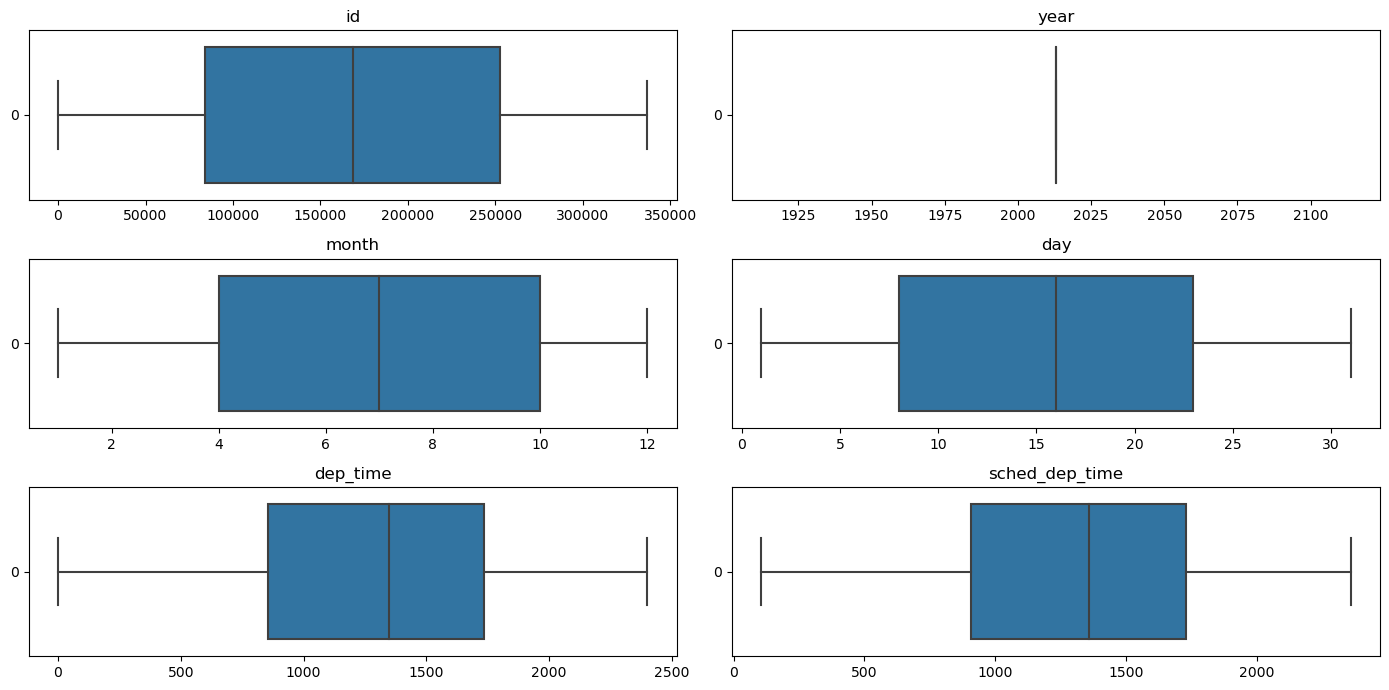

In [16]:
dataset_cont = dataset.drop(['carrier', 'tailnum', 'origin', 'dest', 'time_hour', 'name'], axis=1)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14,7))
for i, ax in enumerate(axes.flat):
    if i < len(dataset_cont.columns):
        sns.boxplot(dataset_cont.iloc[:, i], ax=ax, orient='h')
        ax.set(title=dataset_cont.columns.values[i])
    else:
        ax.axis('off')
plt.tight_layout()
plt.show()

Berdasarkan boxplot yang ditampilkan di atas, visualisasi data numerik dari dataset_cont menggunakan boxplot terlihat bahwa tidak terdapat outliers yang berarti data berada pada kisaran nilai yang stabil dan tidak memiliki jarak yang signifikan.

### Data Visualisasi

In [17]:
color = '#ffcba4'
def plot_hist(column, bins, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts, bins, patches = plt.hist(column, bins=bins, color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    for count, x in zip(counts, bin_centers):
        if count > 0:
            plt.text(x, count, str(int(count)), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
    plt.show()

In [18]:
def plot_bar(column, title, xlabel, fontsize=8, rotation=0):
    plt.figure(figsize=(15,5))
    counts = column.value_counts()
    counts.plot(kind='bar', color=color, edgecolor='white')
    plt.title(title, fontsize=15)
    plt.xlabel(xlabel, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    for i, v in enumerate(counts):
        plt.text(i, v, str(v), fontsize=fontsize, ha='center', va='bottom', rotation=rotation)
    plt.show()

Year in dataset:
2013    336776
Name: year, dtype: int64


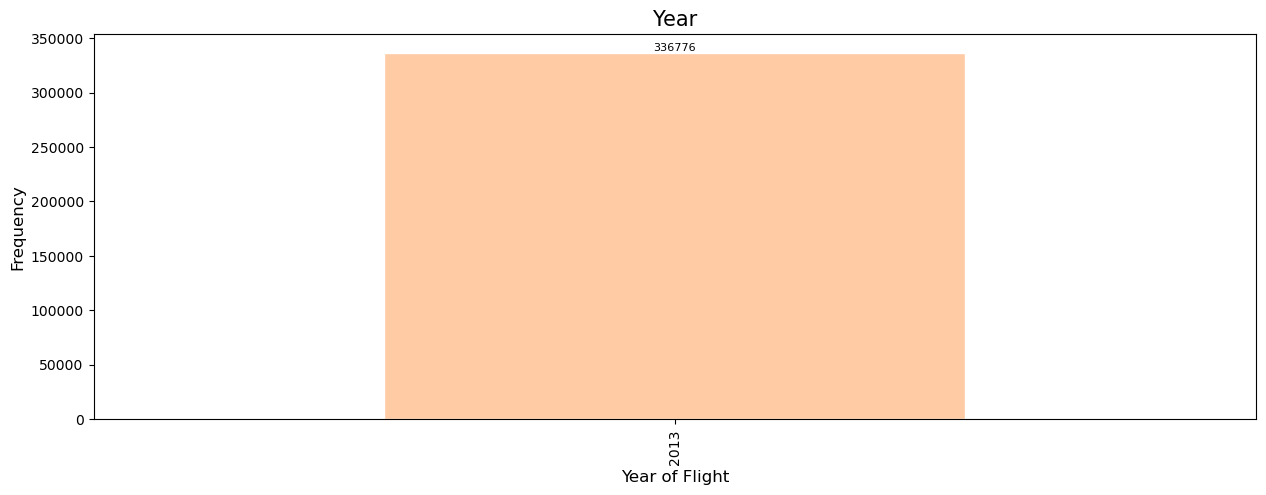

In [19]:
print("Year in dataset:")
print(dataset['year'].value_counts().sort_index())

plot_bar(dataset['year'], 'Year', 'Year of Flight')

Month in dataset:
1     27004
2     24951
3     28834
4     28330
5     28796
6     28243
7     29425
8     29327
9     27574
10    28889
11    27268
12    28135
Name: month, dtype: int64


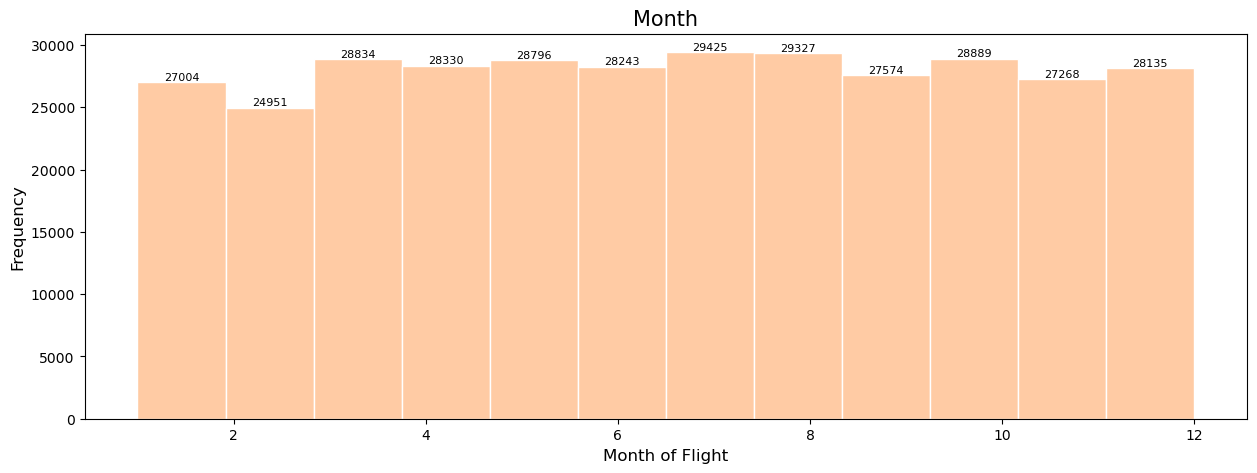

In [20]:
print("Month in dataset:")
print(dataset['month'].value_counts().sort_index())

plot_hist(dataset['month'], bins=12, title='Month', xlabel='Month of Flight')

Day in dataset:
1     11036
2     10808
3     11211
4     11059
5     10858
6     11059
7     10985
8     11271
9     10857
10    11227
11    11359
12    11029
13    11108
14    11008
15    11317
16    10918
17    11222
18    11399
19    11086
20    11111
21    11141
22    11345
23    10966
24    11041
25    11097
26    10883
27    11084
28    10773
29    10039
30    10289
31     6190
Name: day, dtype: int64


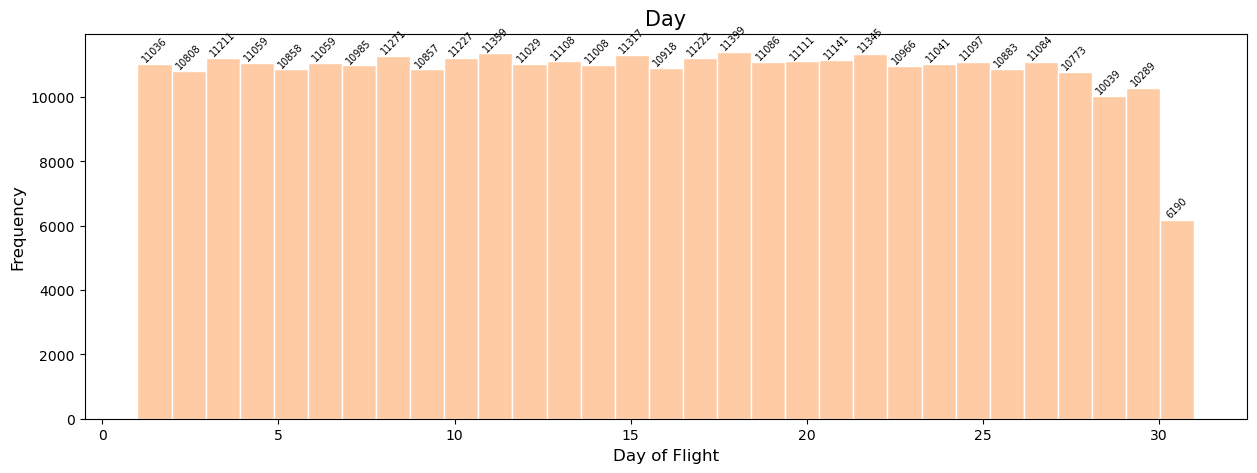

In [21]:
print("Day in dataset:")
print(dataset['day'].value_counts().sort_index())

plot_hist(dataset['day'], bins=31, title='Day', xlabel='Day of Flight', fontsize=7, rotation=45)

Departure Time in dataset:
0.0       8255
1.0         25
2.0         35
3.0         26
4.0         26
          ... 
2356.0      74
2357.0      74
2358.0      76
2359.0      55
2400.0      29
Name: dep_time, Length: 1319, dtype: int64


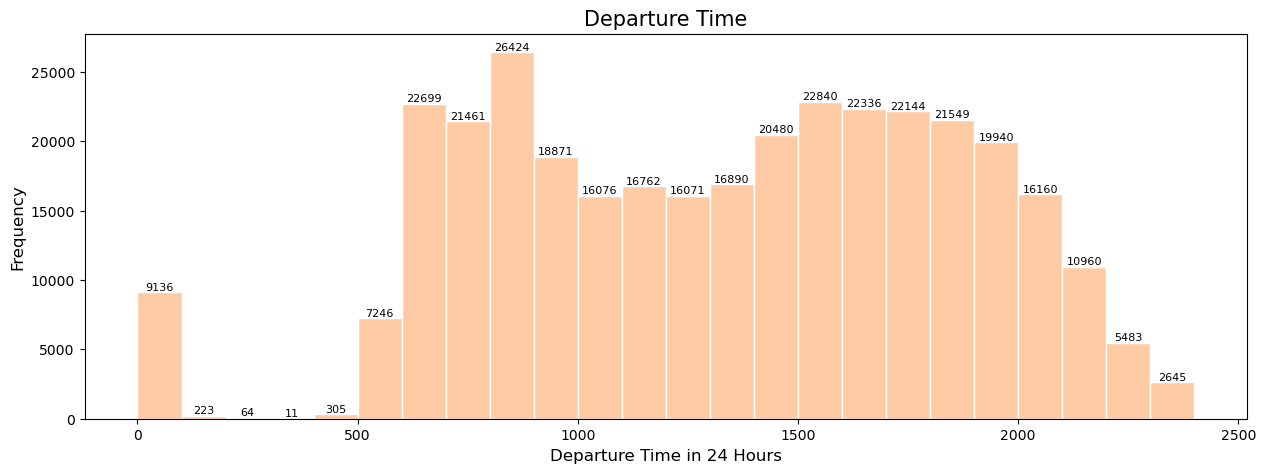

In [22]:
print("Departure Time in dataset:")
print(dataset['dep_time'].value_counts().sort_index())

plot_hist(dataset['dep_time'], bins=24, title='Departure Time', xlabel='Departure Time in 24 Hours')

Schedule Departure Time in dataset:
106       1
500     341
501       1
505       2
510       5
       ... 
2345      1
2352     16
2355     73
2358     44
2359    828
Name: sched_dep_time, Length: 1021, dtype: int64


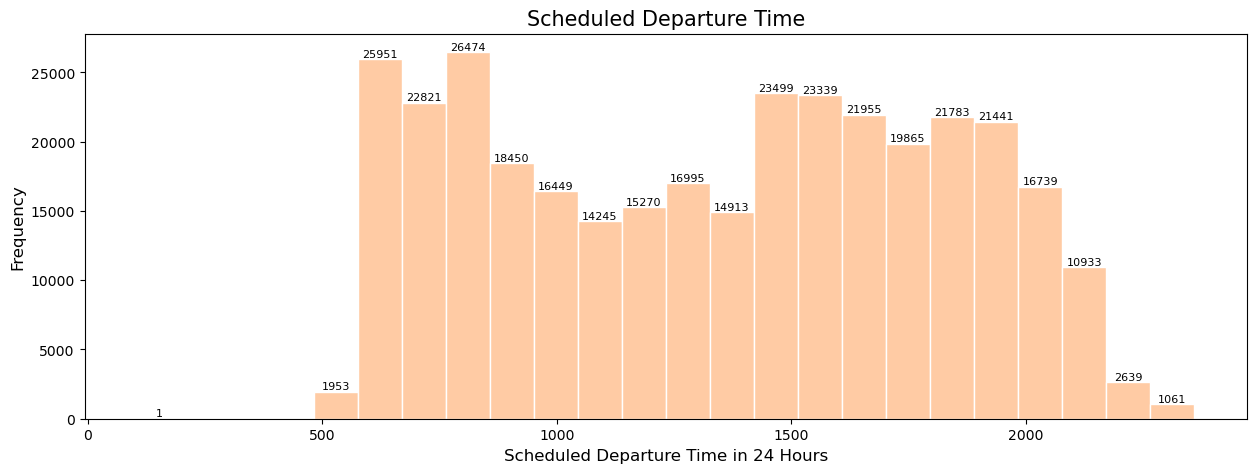

In [23]:
print("Schedule Departure Time in dataset:")
print(dataset['sched_dep_time'].value_counts().sort_index())

plot_hist(dataset['sched_dep_time'], bins=24, title='Scheduled Departure Time', xlabel='Scheduled Departure Time in 24 Hours')

Departure Delay Time in dataset:
-43.0      1
-33.0      1
-32.0      1
-30.0      1
-27.0      1
          ..
 1005.0    1
 1014.0    1
 1126.0    1
 1137.0    1
 1301.0    1
Name: dep_delay, Length: 527, dtype: int64


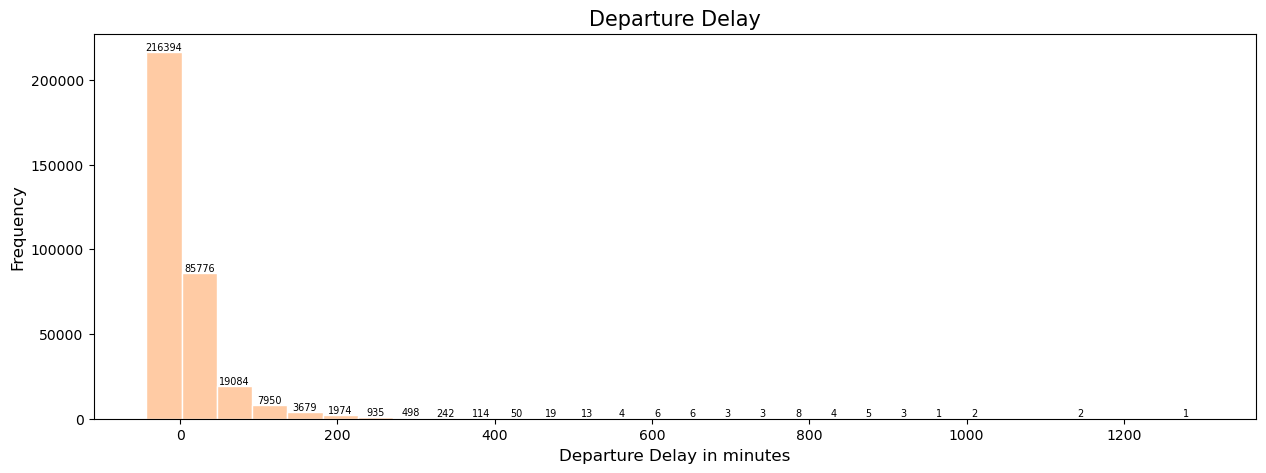

In [24]:
print("Departure Delay Time in dataset:")
print(dataset['dep_delay'].value_counts().sort_index())

plot_hist(dataset['dep_delay'], bins=30, title='Departure Delay', xlabel='Departure Delay in minutes', fontsize=7)

Arrival Time in dataset:
0.0       8713
1.0        201
2.0        164
3.0        174
4.0        173
          ... 
2356.0     202
2357.0     207
2358.0     189
2359.0     222
2400.0     150
Name: arr_time, Length: 1412, dtype: int64


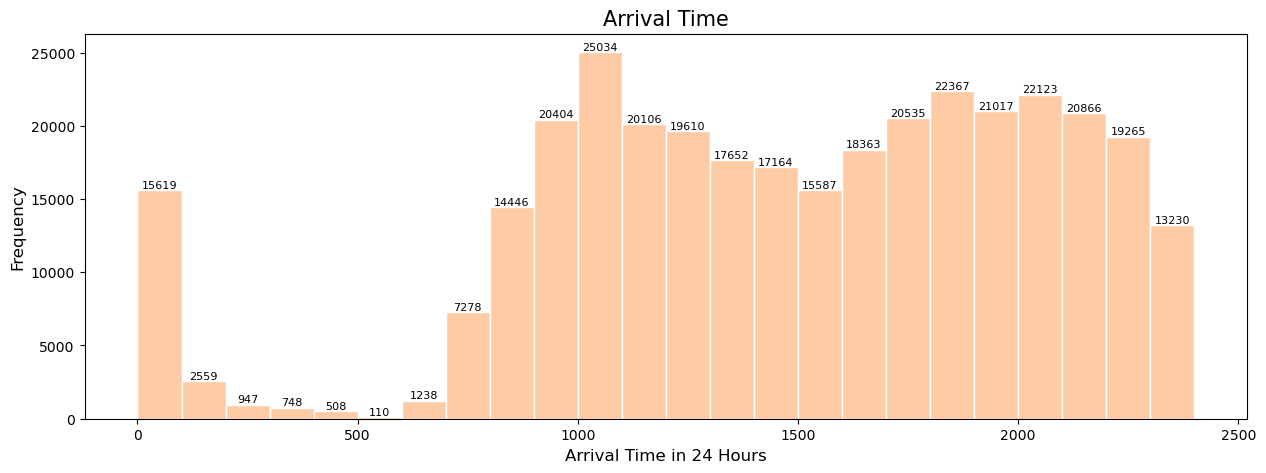

In [25]:
print("Arrival Time in dataset:")
print(dataset['arr_time'].value_counts().sort_index())


plot_hist(dataset['arr_time'], bins=24, title='Arrival Time', xlabel='Arrival Time in 24 Hours')

Shedule Arrival Time in dataset:
1        243
2         95
3        159
4        107
5         82
        ... 
2355     335
2356     468
2357     349
2358     483
2359    1121
Name: sched_arr_time, Length: 1163, dtype: int64


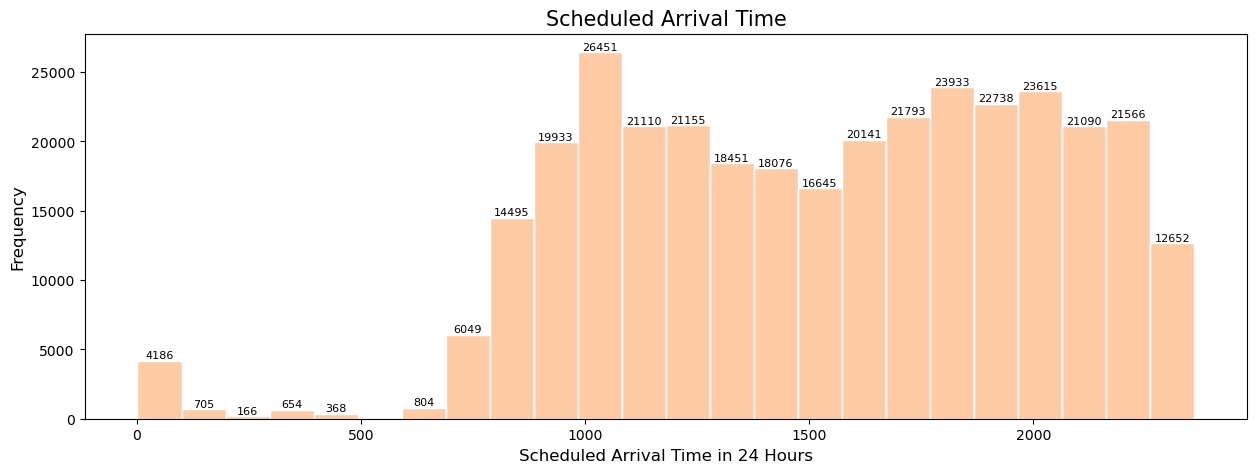

In [26]:
print("Shedule Arrival Time in dataset:")
print(dataset['sched_arr_time'].value_counts().sort_index())


plot_hist(dataset['sched_arr_time'], bins=24, title='Scheduled Arrival Time', xlabel='Scheduled Arrival Time in 24 Hours')

Arrival Delay Time in dataset:
-86.0      1
-79.0      1
-75.0      2
-74.0      1
-73.0      1
          ..
 989.0     1
 1007.0    1
 1109.0    1
 1127.0    1
 1272.0    1
Name: arr_delay, Length: 577, dtype: int64


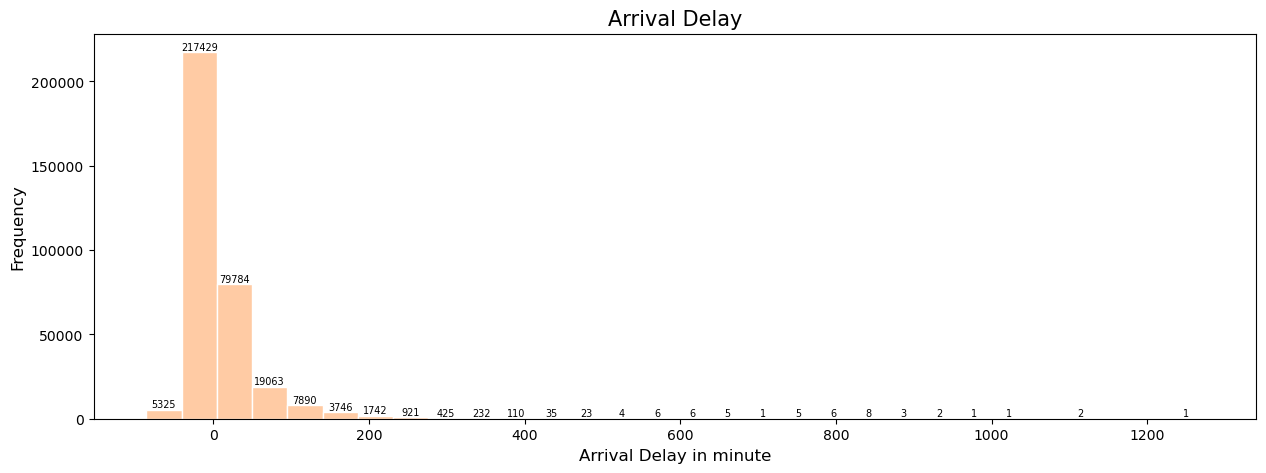

In [27]:
print("Arrival Delay Time in dataset:")
print(dataset['arr_delay'].value_counts().sort_index())

plot_hist(dataset['arr_delay'], bins=30, title='Arrival Delay', xlabel='Arrival Delay in minute', fontsize=7)

Carrier in dataset:
9E    18460
AA    32729
AS      714
B6    54635
DL    48110
EV    54173
F9      685
FL     3260
HA      342
MQ    26397
OO       32
UA    58665
US    20536
VX     5162
WN    12275
YV      601
Name: carrier, dtype: int64


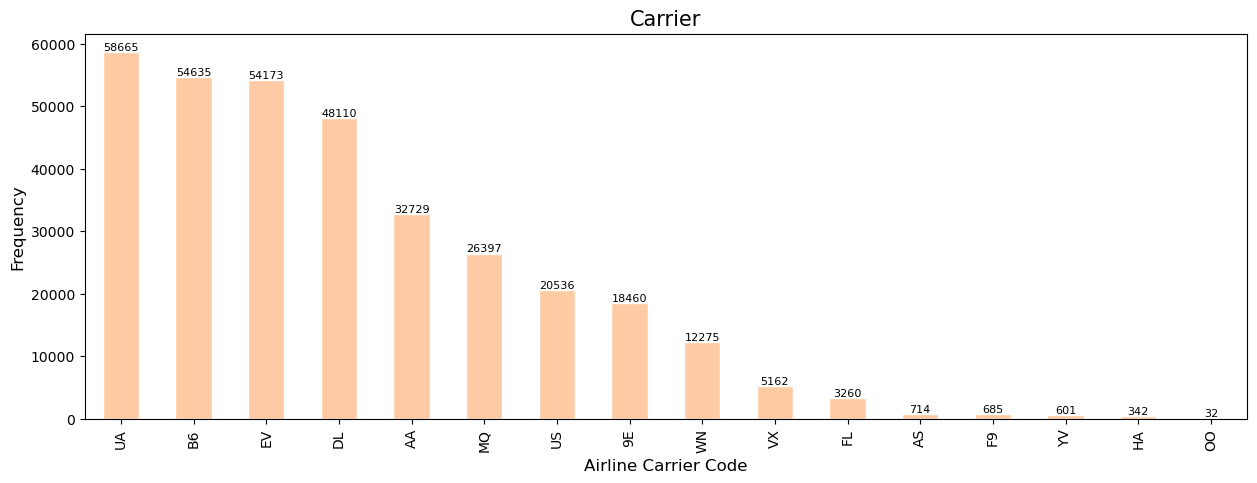

In [28]:
print("Carrier in dataset:")
print(dataset['carrier'].value_counts().sort_index())

plot_bar(dataset['carrier'], 'Carrier', 'Airline Carrier Code')

Origin in dataset:
EWR    120835
JFK    111279
LGA    104662
Name: origin, dtype: int64


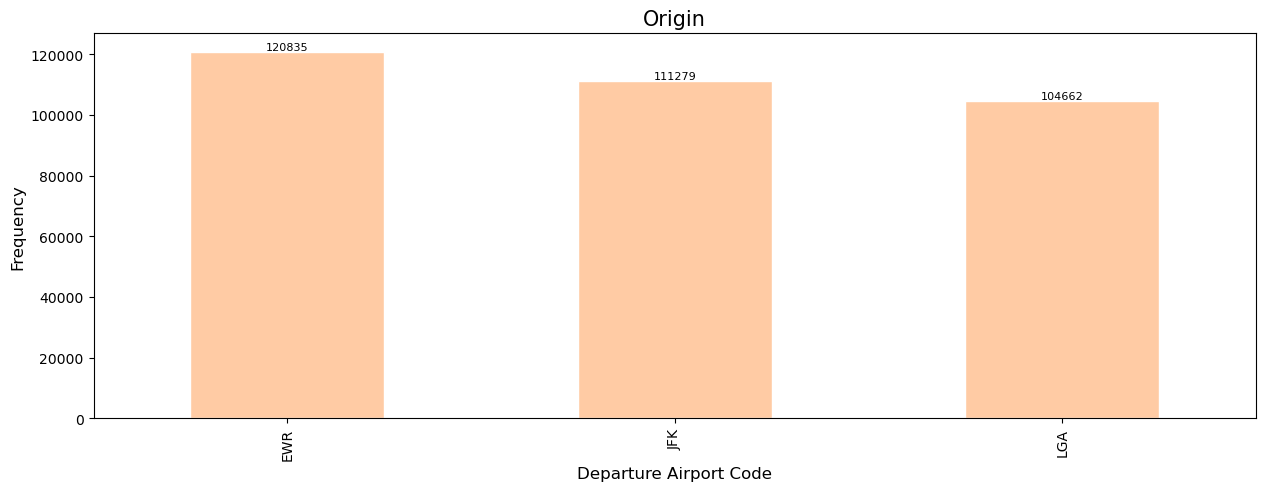

In [29]:
print("Origin in dataset:")
print(dataset['origin'].value_counts().sort_index())

plot_bar(dataset['origin'], 'Origin', 'Departure Airport Code')

Destination in dataset:
ABQ      254
ACK      265
ALB      439
ANC        8
ATL    17215
       ...  
TPA     7466
TUL      315
TVC      101
TYS      631
XNA     1036
Name: dest, Length: 105, dtype: int64


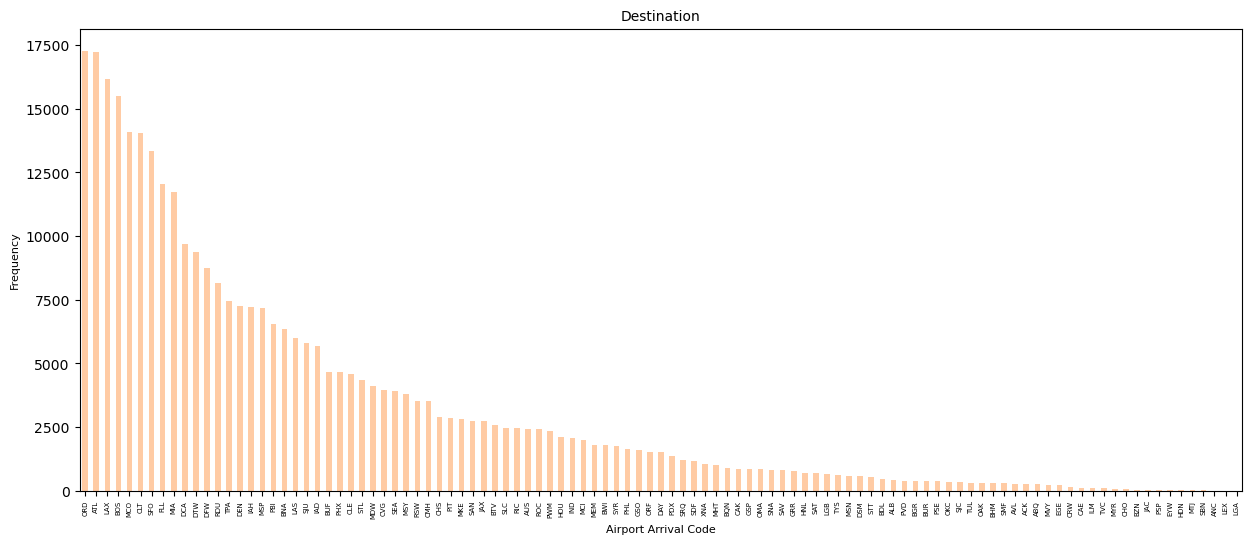

In [30]:
print("Destination in dataset:")
print(dataset['dest'].value_counts().sort_index())

plt.figure(figsize=(15, 6))
dataset['dest'].value_counts().plot(kind='bar', color=color)
plt.title('Destination', fontsize=10)
plt.xlabel('Airport Arrival Code', fontsize=8)
plt.ylabel('Frequency', fontsize=8)
plt.xticks(fontsize=5)
plt.show()

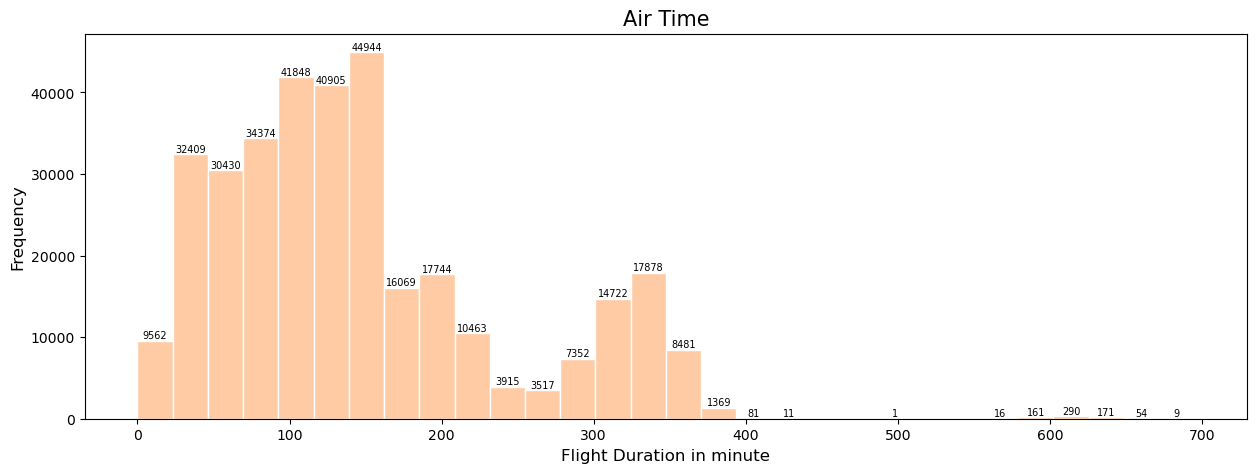

In [31]:
plot_hist(dataset['air_time'], bins=30, title='Air Time', xlabel='Flight Duration in minute', fontsize=7)

Distance in dataset:
17         1
80        49
94       976
96       607
116      443
        ... 
2576     312
2586    8204
3370       8
4963     365
4983     342
Name: distance, Length: 214, dtype: int64


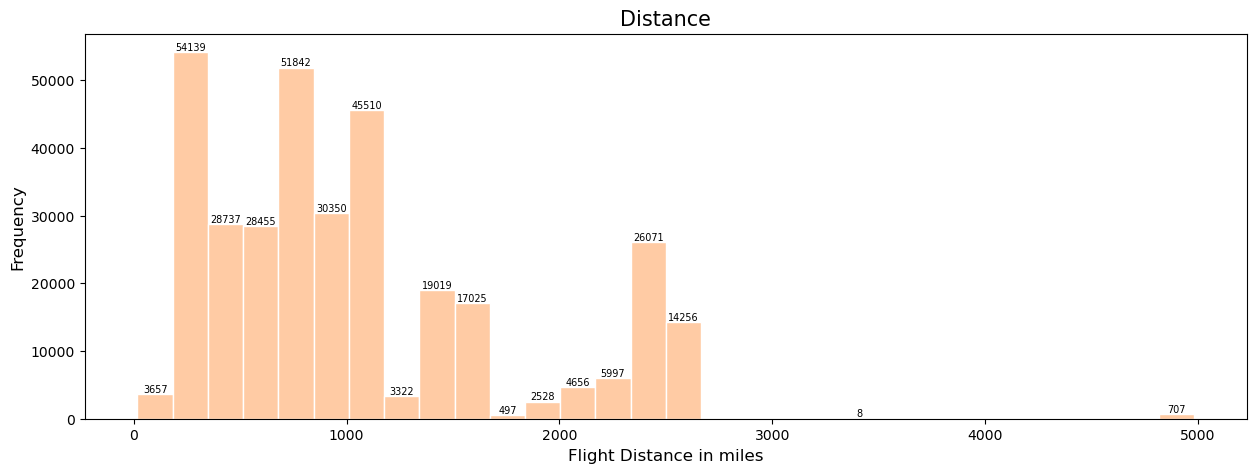

In [32]:
print("Distance in dataset:")
print(dataset['distance'].value_counts().sort_index())

plot_hist(dataset['distance'], bins=30, title='Distance', xlabel='Flight Distance in miles', fontsize=7)

Hour Time in dataset:
1         1
5      1953
6     25951
7     22821
8     27242
9     20312
10    16708
11    16033
12    18181
13    19956
14    21706
15    23888
16    23002
17    24426
18    21783
19    21441
20    16739
21    10933
22     2639
23     1061
Name: hour, dtype: int64


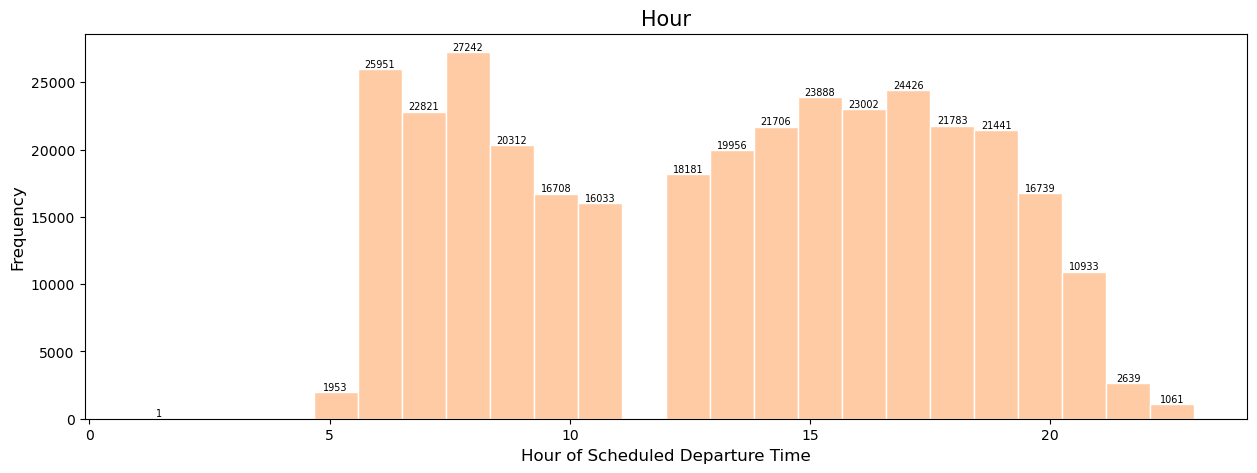

In [33]:
print("Hour Time in dataset:")
print(dataset['hour'].value_counts().sort_index())

plot_hist(dataset['hour'], bins=24, title='Hour', xlabel='Hour of Scheduled Departure Time', fontsize=7)

Minute Time in dataset:
0     60696
1      2116
2       848
3      1439
4      1357
5     14118
6      1381
7      1092
8      1695
9      1445
10    14503
11     1227
12     1123
13      729
14     1547
15    18868
16     1044
17     1081
18      785
19     1762
20    12183
21     1374
22     1262
23      894
24     1208
25    14450
26      961
27     1106
28     1270
29    13823
30    33899
31     1171
32     1258
33      907
34     1347
35    13323
36     1728
37      971
38     1317
39     1387
40    13546
41      989
42     1120
43     1155
44     1668
45    20398
46     1616
47     1512
48     1418
49     1611
50    12508
51     1184
52     1281
53     1382
54     1405
55    18834
56     1713
57     1388
58     1065
59    16288
Name: minute, dtype: int64


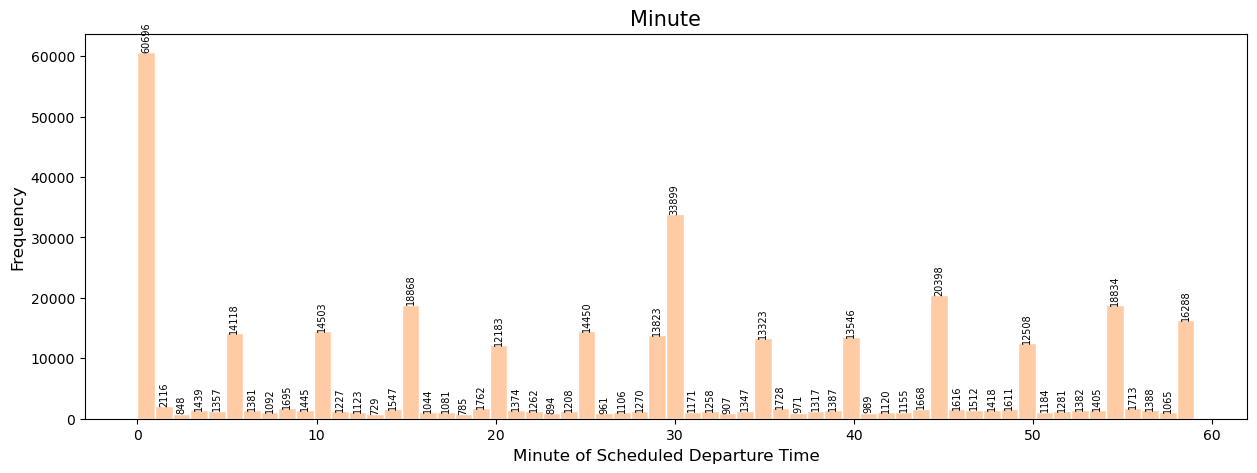

In [34]:
print("Minute Time in dataset:")
print(dataset['minute'].value_counts().sort_index())

plot_hist(dataset['minute'], bins=60, title='Minute', xlabel='Minute of Scheduled Departure Time', fontsize=7, rotation=90)

Airline Name in dataset:
AirTran Airways Corporation     3260
Alaska Airlines Inc.             714
American Airlines Inc.         32729
Delta Air Lines Inc.           48110
Endeavor Air Inc.              18460
Envoy Air                      26397
ExpressJet Airlines Inc.       54173
Frontier Airlines Inc.           685
Hawaiian Airlines Inc.           342
JetBlue Airways                54635
Mesa Airlines Inc.               601
SkyWest Airlines Inc.             32
Southwest Airlines Co.         12275
US Airways Inc.                20536
United Air Lines Inc.          58665
Virgin America                  5162
Name: name, dtype: int64


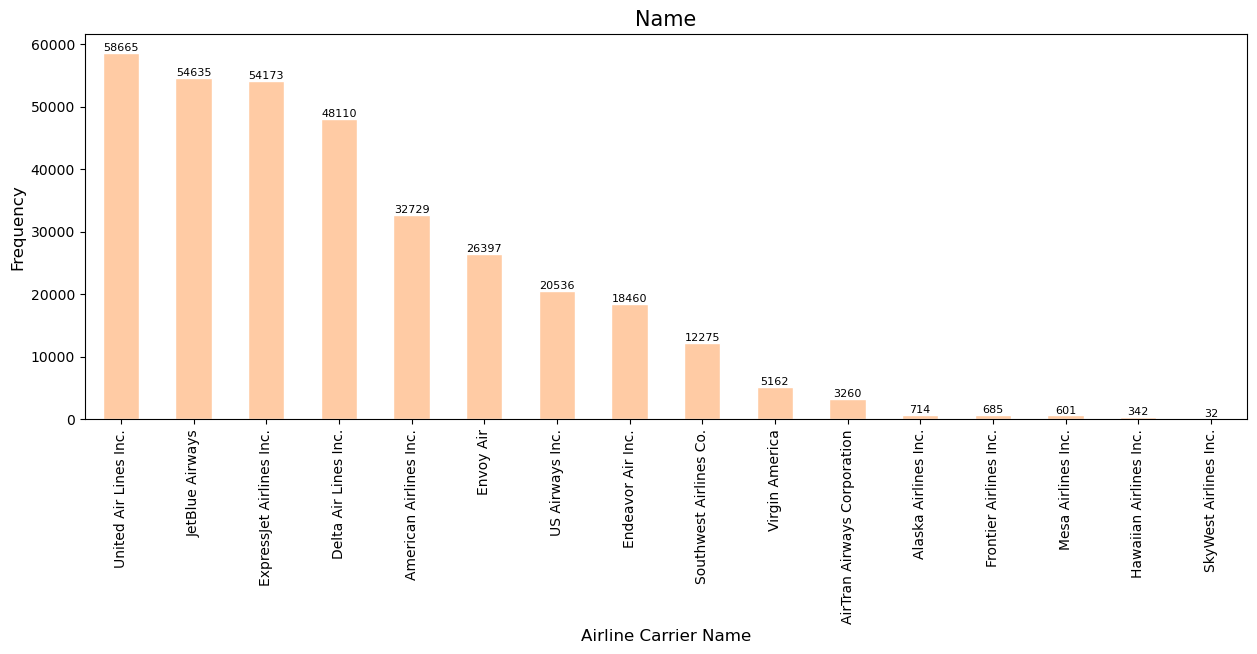

In [35]:
print("Airline Name in dataset:")
print(dataset['name'].value_counts().sort_index())

plot_bar(dataset['name'], 'Name', 'Airline Carrier Name')

Berdasarkan visualisasi dataset di atas menggunakan barplot, dapat disimpulkan beberapa hal antara lain :
1. Dataset hanya diambil pada tahun 2013.
2. Akumulasi penerbangan paling tinggi terjadi pada bulan Juli dan paling rendah pada bulan Februari.
3. Dalam satu bulan, penerbangan paling rendah terjadi pada tanggal 31.
4. Waktu jadwal keberangkatan paling banyak dilakukan sekitar pada pukul 06.00 dan 18.00.
5. Waktu keberangkatan penerbangan secara real time sebagian besar mendekati dengan waktu keberangkatan yang dijadwalkan.
6. Kode maskapai yang paling banyak melakukan penerbangan adalah UA dan yang terendah adalah OO.
7. Bandara yang paling sering menjadi tempat keberangkatan adalah EWR, selanjutnya ada JFK dan LGA.
8. Destinasi keberangkatan yang paling sering dikunjungi adalah ORD dan yang paling jarang adalah LGA.
9. Durasi penerbangan yang paling digemari oleh penumpang adalah sekitar 50 hingga 200 menit penerbangan.
10. Rata-rata jarak penerbangan yang paling sering dilakukan adalah 500 hingga 1000 mil.
11. Penerbangan di malam hari lebih digemari dibandingkan dengan penerbangan pada pagi/siang hari.
12. Maskapai penerbangan yang paling sering digunakan adalah United Air Lines Inc. dan yang paling rendah adalah SkyWest Airlines Inc.

## Menyajikan Rata-Rata Keterlambatan Kedatangan Berdasarkan Variabel-Variabel Pada Dataset

    month  arr_delay
0       1   5.992409
1       2   5.311571
2       3   5.619859
3       4  10.873879
4       5   3.439818
5       6  15.799738
6       7  16.068411
7       8   5.923040
8       9  -3.936172
9      10  -0.165496
10     11   0.456322
11     12  14.281038


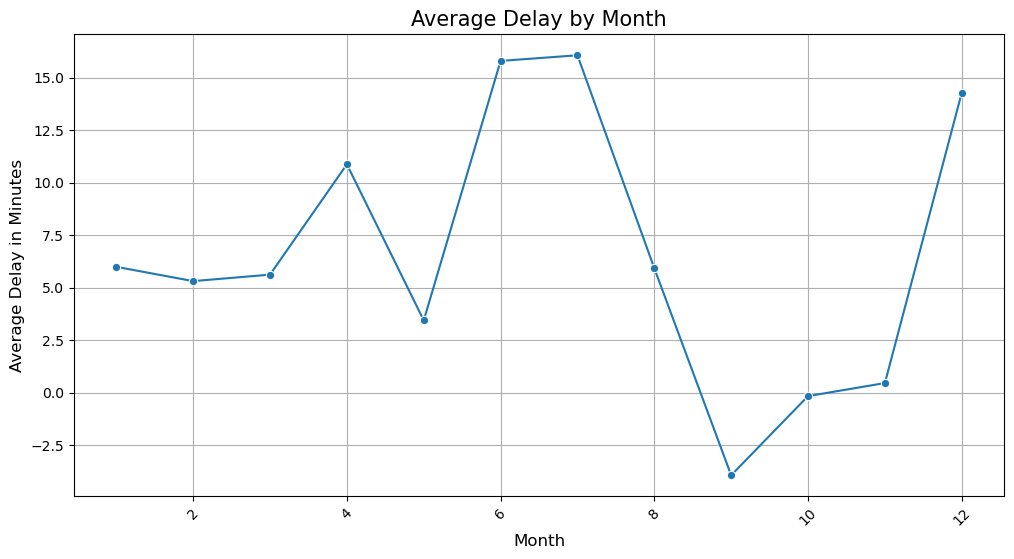

In [36]:
mean_month = dataset.pivot_table(index='month', values='arr_delay', aggfunc='mean').reset_index()
print(mean_month)

plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_month, x='month', y='arr_delay', marker='o')
plt.title('Average Delay by Month', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Delay in Minutes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

    day  arr_delay
0     1   7.171530
1     2   6.590211
2     3   4.413701
3     4  -1.764988
4     5   0.481212
5     6  -1.696085
6     7   9.232317
7     8  17.442640
8     9   8.431611
9    10  13.931415
10   11  10.169909
11   12  10.661257
12   13   9.095337
13   14   3.123547
14   15  -1.328444
15   16   3.675307
16   17   9.844502
17   18   9.870076
18   19   9.939834
19   20   1.364324
20   21   2.748138
21   22  16.852622
22   23  16.045869
23   24  10.193732
24   25   9.523925
25   26   3.602683
26   27   3.259383
27   28   7.895665
28   29  -0.130690
29   30   0.689085
30   31   3.276737


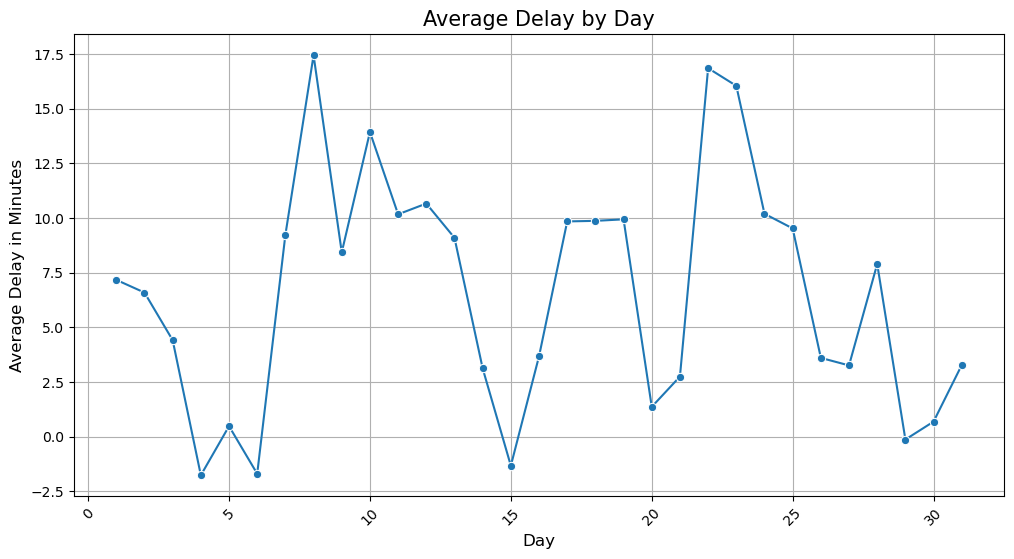

In [37]:
mean_day = dataset.pivot_table(index='day', values='arr_delay', aggfunc='mean').reset_index()
print(mean_day)

plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_day, x='day', y='arr_delay', marker='o', sort=False)
plt.title('Average Delay by Day', fontsize=15)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Average Delay in Minutes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

   carrier  arr_delay
0       9E   6.913543
1       AA   0.355587
2       AS  -9.861345
3       B6   9.356530
4       DL   1.628892
5       EV  14.902701
6       F9  21.792701
7       FL  19.591411
8       HA  -6.915205
9       MQ  10.219608
10      OO  10.812500
11      UA   3.504458
12      US   2.056486
13      VX   1.748741
14      WN   9.467536
15      YV  14.081531


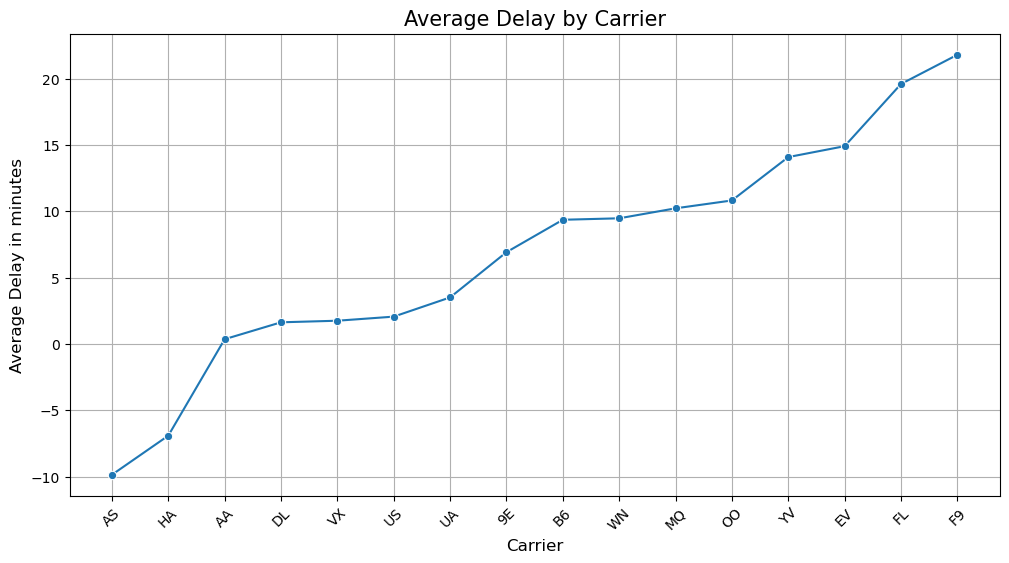

In [38]:
mean_carrier = dataset.pivot_table(index=['carrier'], values='arr_delay', aggfunc='mean').reset_index()
print(mean_carrier)

mean_carrier = mean_carrier.sort_values(by='arr_delay')
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_carrier, x='carrier', y='arr_delay', marker='o')
plt.title('Average Delay by Carrier', fontsize=15)
plt.xlabel('Carrier', fontsize=12)
plt.ylabel('Average Delay in minutes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

  origin  arr_delay
0    EWR   8.827591
1    JFK   5.441728
2    LGA   5.588867


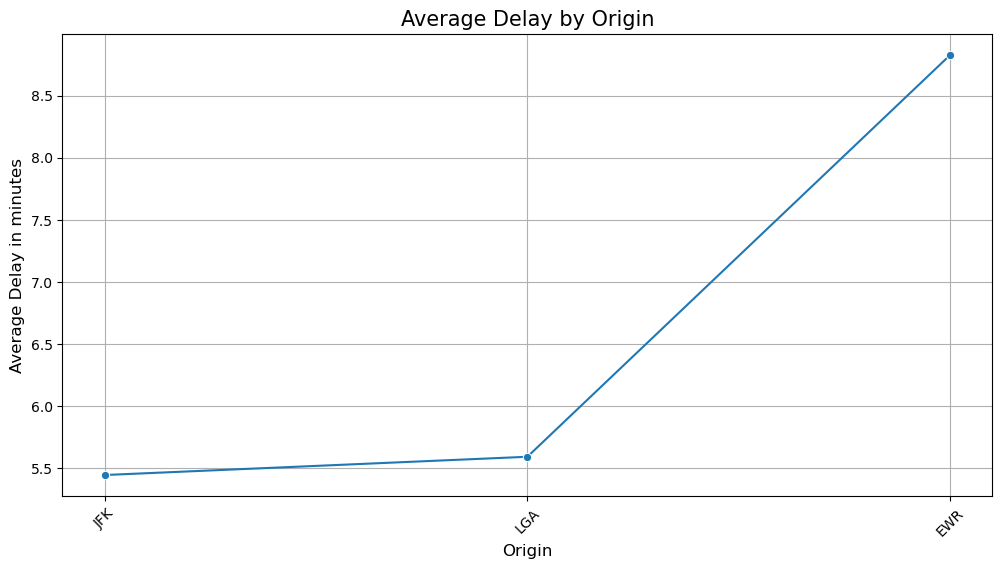

In [39]:
mean_origin = dataset.pivot_table(index=['origin'], values='arr_delay', aggfunc='mean').reset_index()
print(mean_origin)

mean_origin = mean_origin.sort_values(by='arr_delay')
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_origin, x='origin', y='arr_delay', marker='o')
plt.title('Average Delay by Origin', fontsize=15)
plt.xlabel('Origin', fontsize=12)
plt.ylabel('Average Delay in minutes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

    dest  arr_delay
0    ABQ   4.381890
1    ACK   4.833962
2    ALB  13.708428
3    ANC  -2.500000
4    ATL  11.051990
..   ...        ...
100  TPA   7.333110
101  TUL  31.415873
102  TVC  12.198020
103  TYS  22.047544
104  XNA   7.148649

[105 rows x 2 columns]


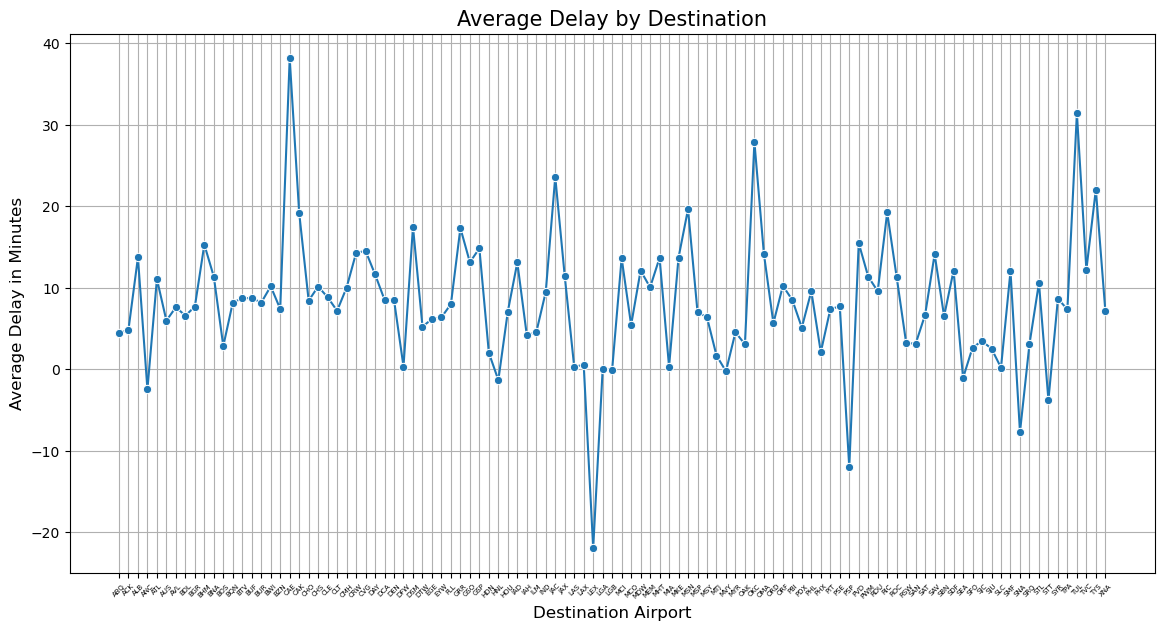

In [40]:
mean_dest = dataset.pivot_table(index='dest', values='arr_delay', aggfunc='mean').reset_index()
print(mean_dest)

plt.figure(figsize=(14, 7))
sns.lineplot(data=mean_dest, x='dest', y='arr_delay', marker='o', linestyle='-', color='#1f77b4')
plt.title('Average Delay by Destination', fontsize=15)
plt.xlabel('Destination Airport', fontsize=12)
plt.ylabel('Average Delay in Minutes', fontsize=12)
plt.xticks(fontsize=5, rotation=45)
plt.grid(True)
plt.show()

                           name  arr_delay
0   AirTran Airways Corporation  19.591411
1          Alaska Airlines Inc.  -9.861345
2        American Airlines Inc.   0.355587
3          Delta Air Lines Inc.   1.628892
4             Endeavor Air Inc.   6.913543
5                     Envoy Air  10.219608
6      ExpressJet Airlines Inc.  14.902701
7        Frontier Airlines Inc.  21.792701
8        Hawaiian Airlines Inc.  -6.915205
9               JetBlue Airways   9.356530
10           Mesa Airlines Inc.  14.081531
11        SkyWest Airlines Inc.  10.812500
12       Southwest Airlines Co.   9.467536
13              US Airways Inc.   2.056486
14        United Air Lines Inc.   3.504458
15               Virgin America   1.748741


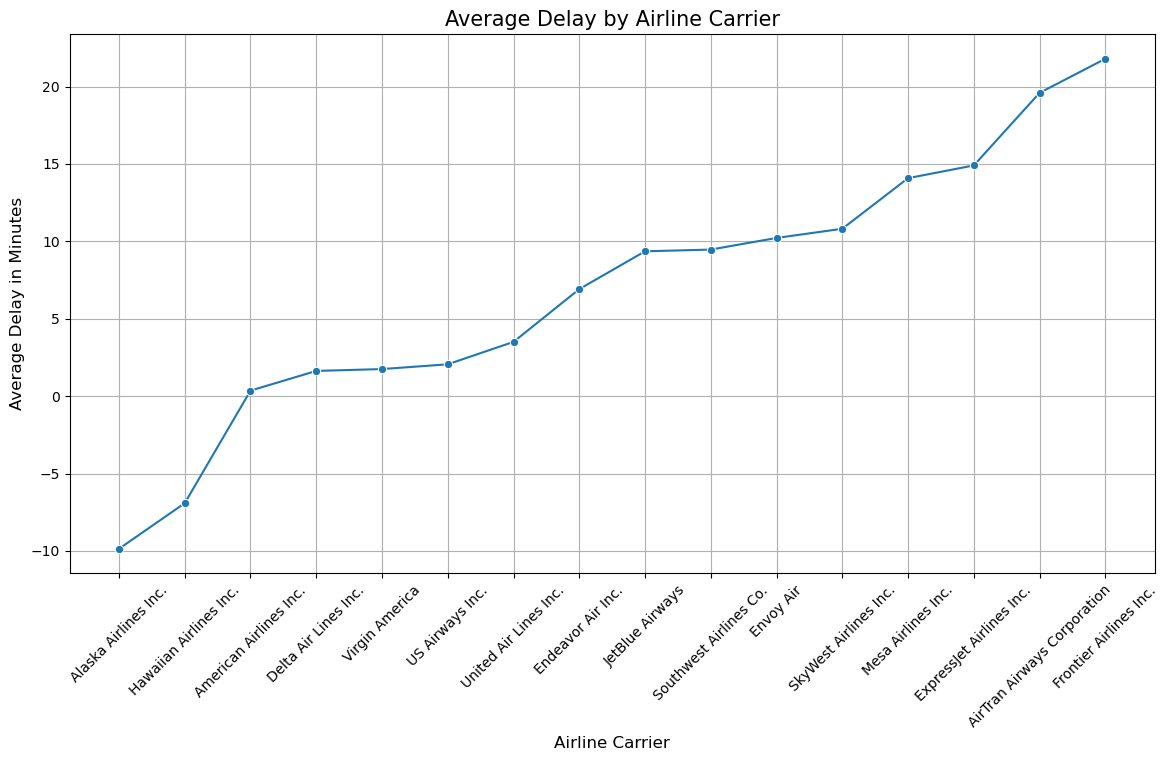

In [41]:
mean_name = dataset.pivot_table(index='name', values='arr_delay', aggfunc='mean').reset_index()
print(mean_name)

mean_name = mean_name.sort_values(by='arr_delay')
plt.figure(figsize=(14, 7))
sns.lineplot(data=mean_name, x='name', y='arr_delay', marker='o', linestyle='-', color='#1f77b4')
plt.title('Average Delay by Airline Carrier', fontsize=15)
plt.xlabel('Airline Carrier', fontsize=12)
plt.ylabel('Average Delay in Minutes', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Analisis Hubungan Variabel Arrival Delay dan Variabel Lainnya dengan Scatter Plot

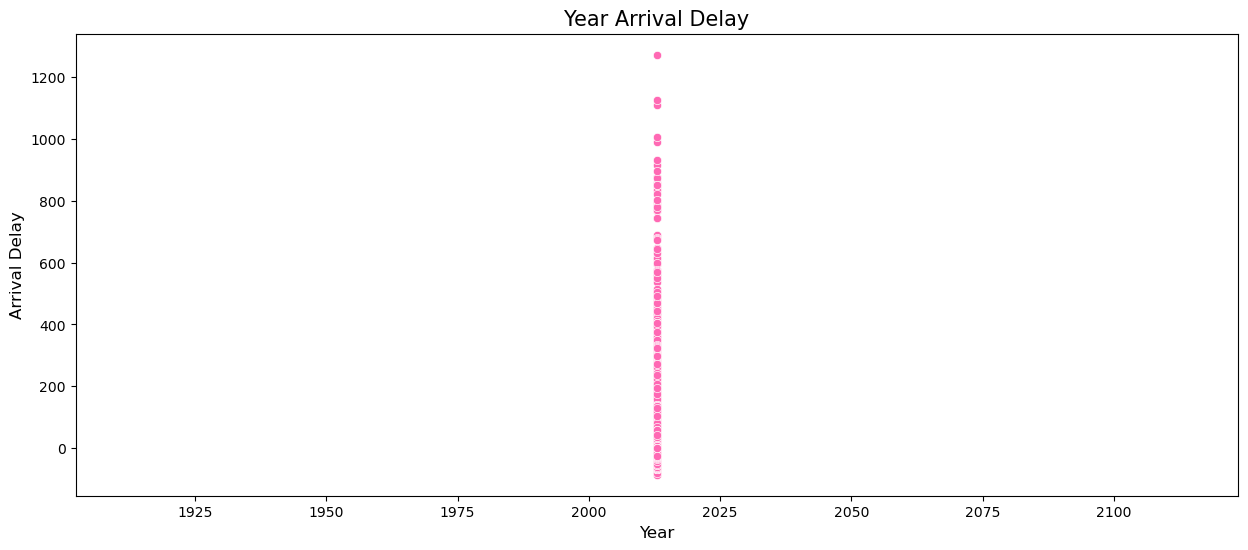

In [42]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=dataset['year'], y=dataset['arr_delay'], color='#ff69b4')
plt.title('Year Arrival Delay', fontsize=15)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Arrival Delay', fontsize=12)
plt.show()

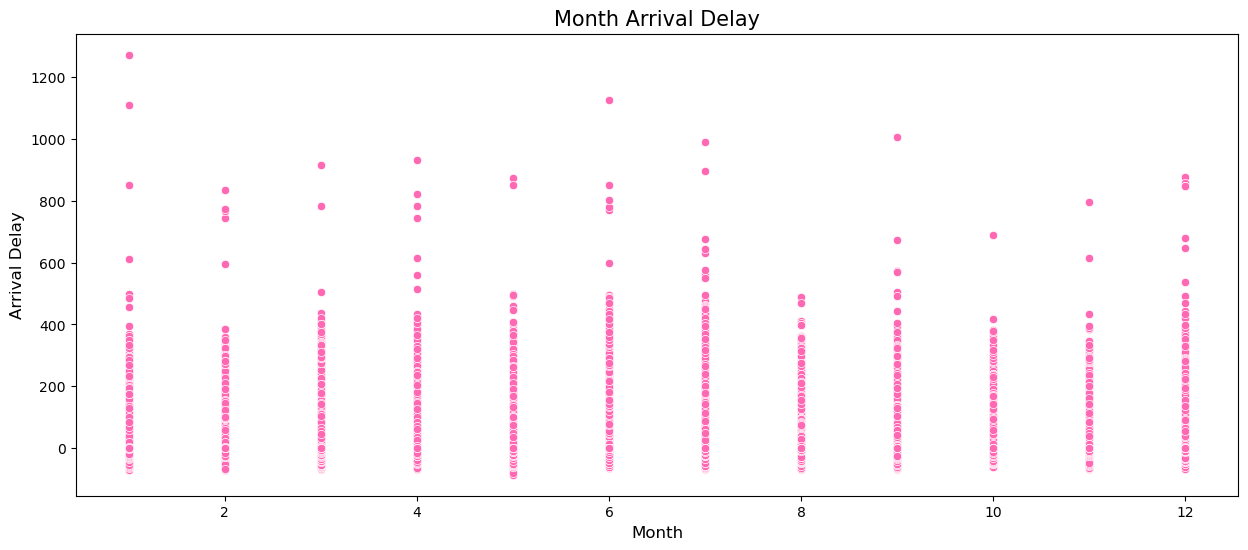

In [43]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=dataset['month'], y=dataset['arr_delay'], color='#ff69b4')
plt.title('Month Arrival Delay', fontsize=15)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Arrival Delay', fontsize=12)
plt.show()

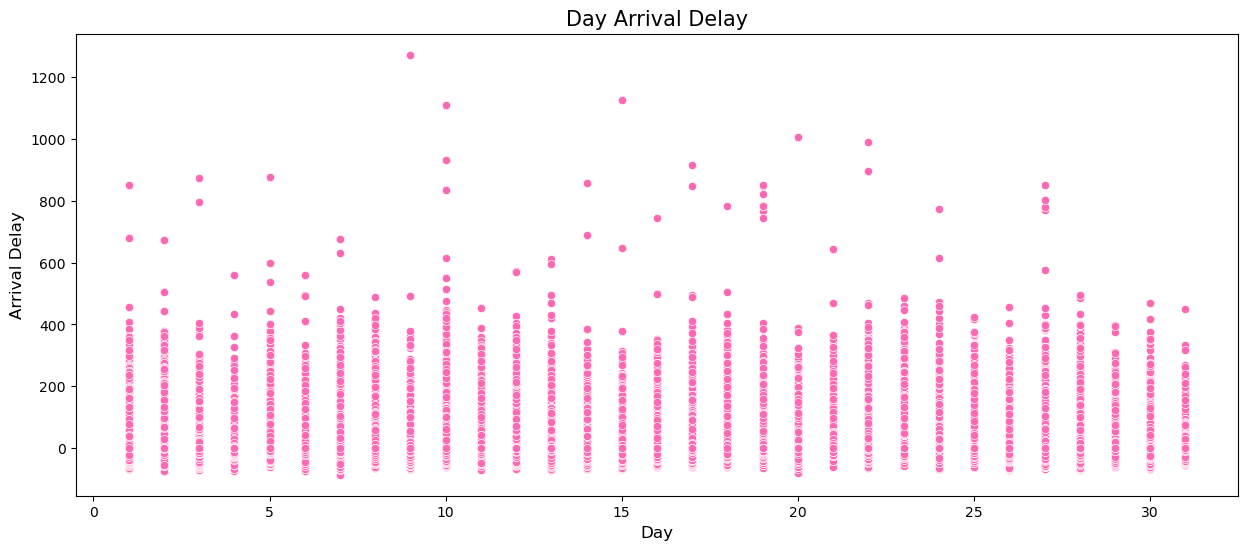

In [44]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=dataset['day'], y=dataset['arr_delay'], color='#ff69b4')
plt.title('Day Arrival Delay', fontsize=15)
plt.xlabel('Day', fontsize=12)
plt.ylabel('Arrival Delay', fontsize=12)
plt.show()

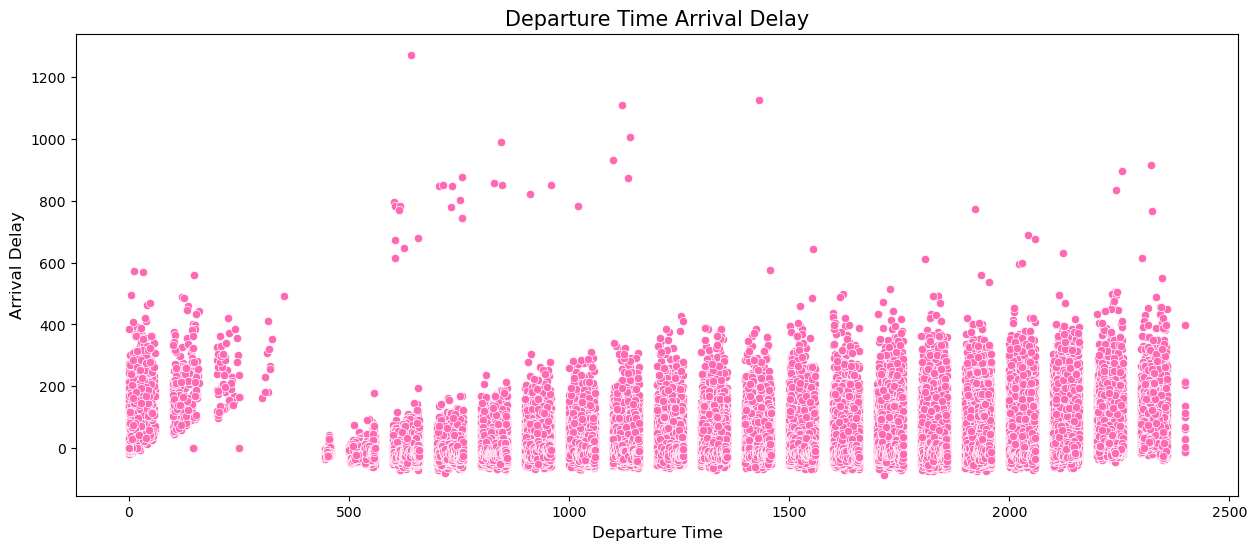

In [45]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=dataset['dep_time'], y=dataset['arr_delay'], color='#ff69b4')
plt.title('Departure Time Arrival Delay', fontsize=15)
plt.xlabel('Departure Time', fontsize=12)
plt.ylabel('Arrival Delay', fontsize=12)
plt.show()

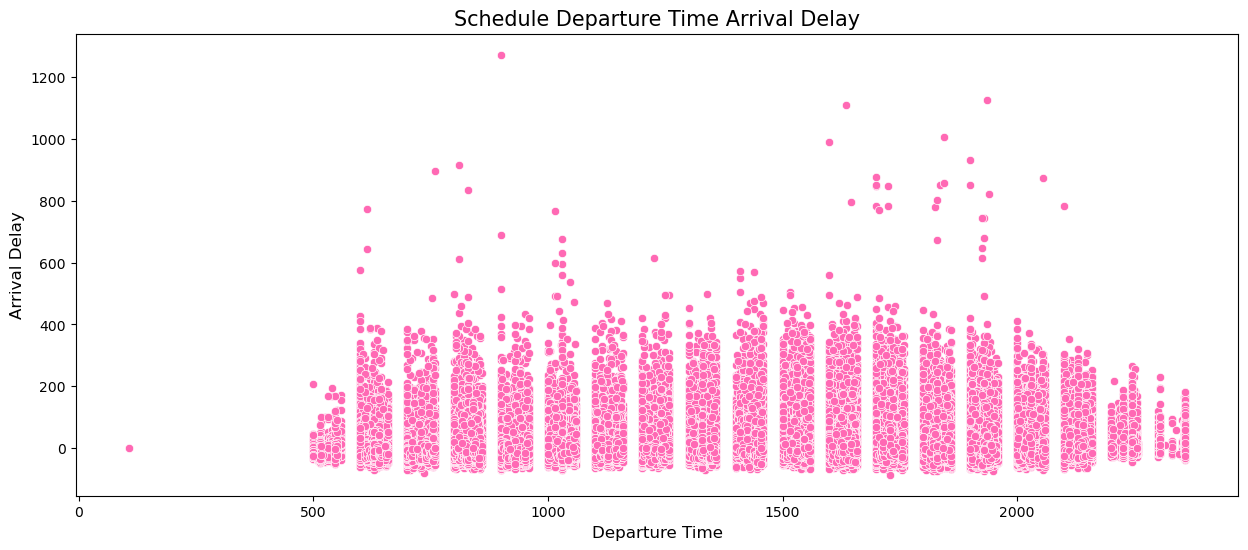

In [46]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=dataset['sched_dep_time'], y=dataset['arr_delay'], color='#ff69b4')
plt.title('Schedule Departure Time Arrival Delay', fontsize=15)
plt.xlabel('Departure Time', fontsize=12)
plt.ylabel('Arrival Delay', fontsize=12)
plt.show()

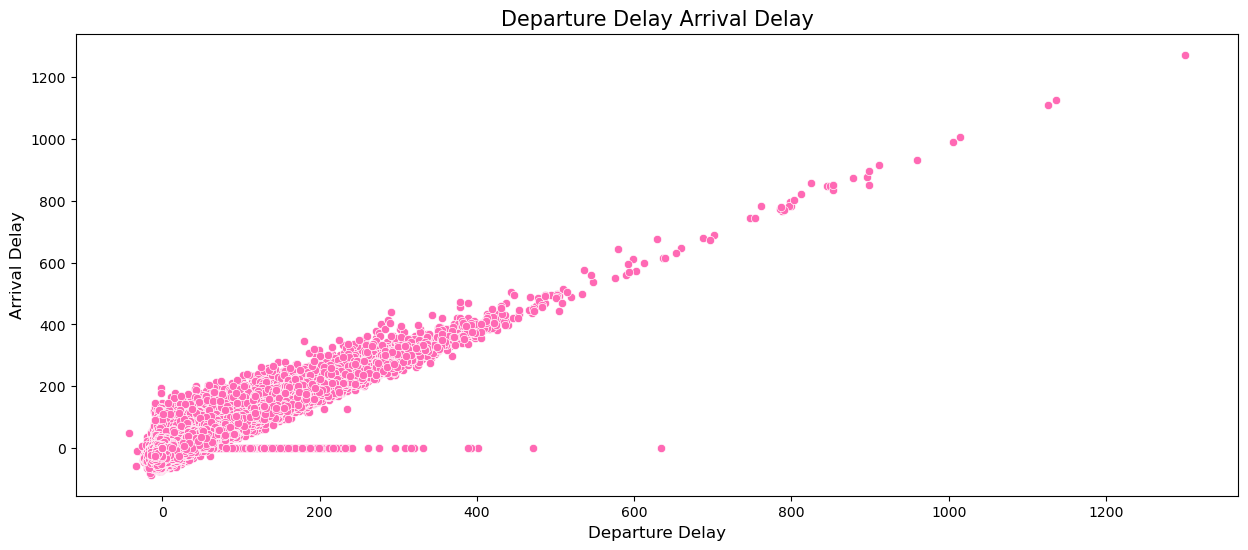

In [47]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=dataset['dep_delay'], y=dataset['arr_delay'], color='#ff69b4')
plt.title('Departure Delay Arrival Delay', fontsize=15)
plt.xlabel('Departure Delay', fontsize=12)
plt.ylabel('Arrival Delay', fontsize=12)
plt.show()

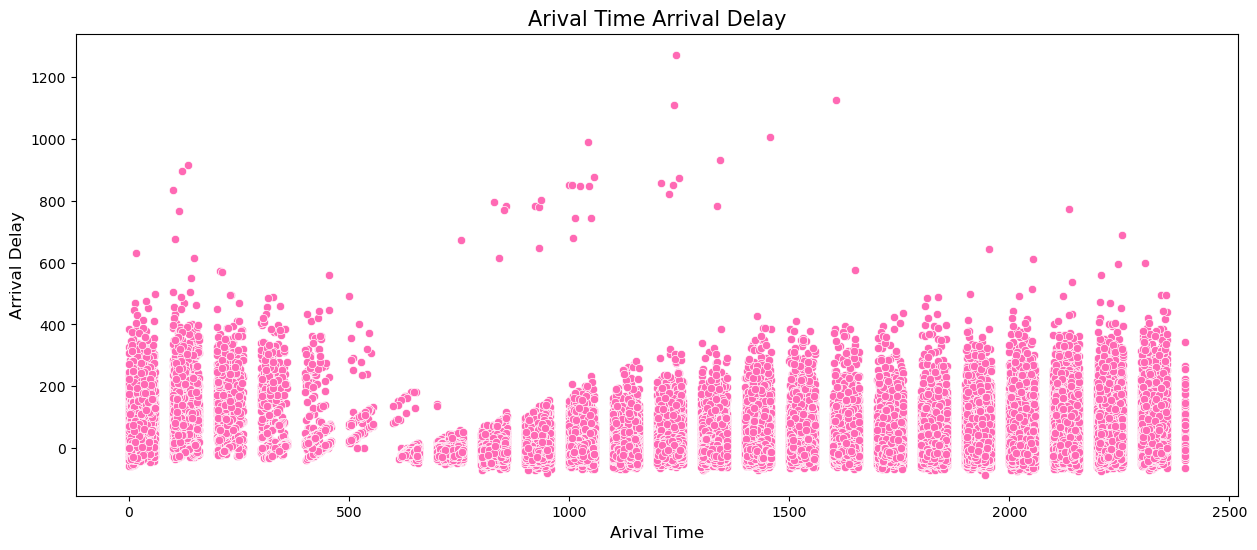

In [48]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=dataset['arr_time'], y=dataset['arr_delay'], color='#ff69b4')
plt.title('Arival Time Arrival Delay', fontsize=15)
plt.xlabel('Arival Time', fontsize=12)
plt.ylabel('Arrival Delay', fontsize=12)
plt.show()

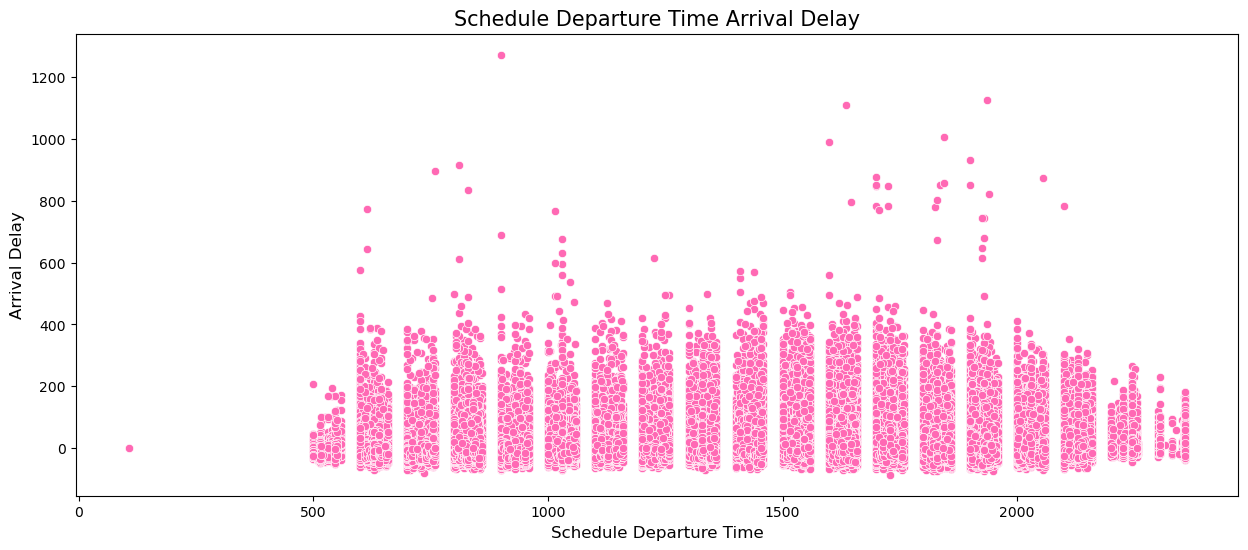

In [49]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=dataset['sched_dep_time'], y=dataset['arr_delay'], color='#ff69b4')
plt.title('Schedule Departure Time Arrival Delay', fontsize=15)
plt.xlabel('Schedule Departure Time', fontsize=12)
plt.ylabel('Arrival Delay', fontsize=12)
plt.show()

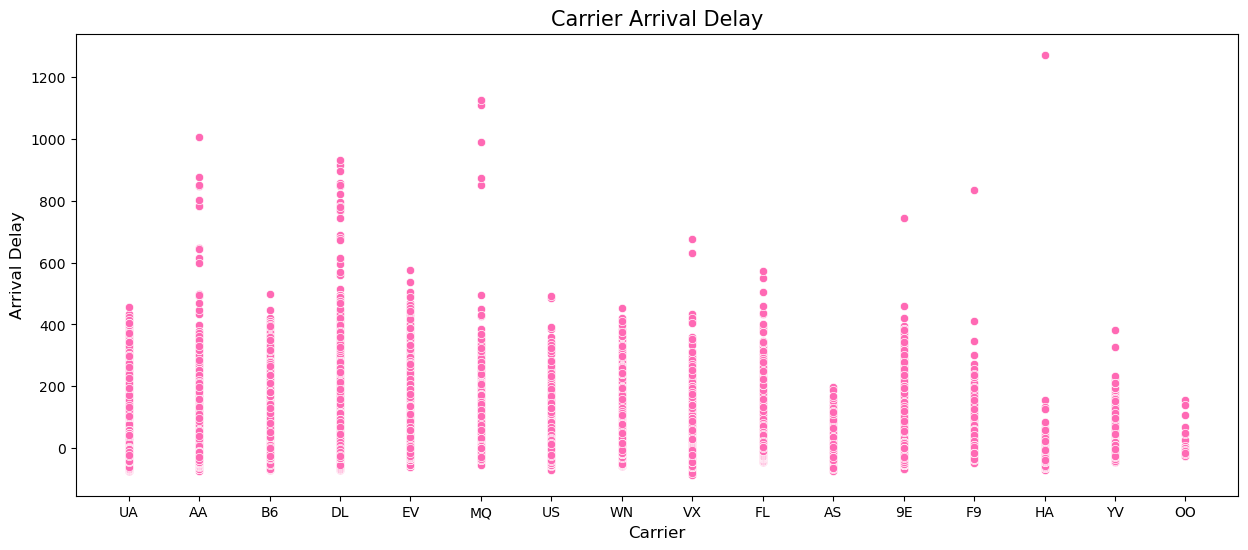

In [50]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=dataset['carrier'], y=dataset['arr_delay'], color='#ff69b4')
plt.title('Carrier Arrival Delay', fontsize=15)
plt.xlabel('Carrier', fontsize=12)
plt.ylabel('Arrival Delay', fontsize=12)
plt.show()

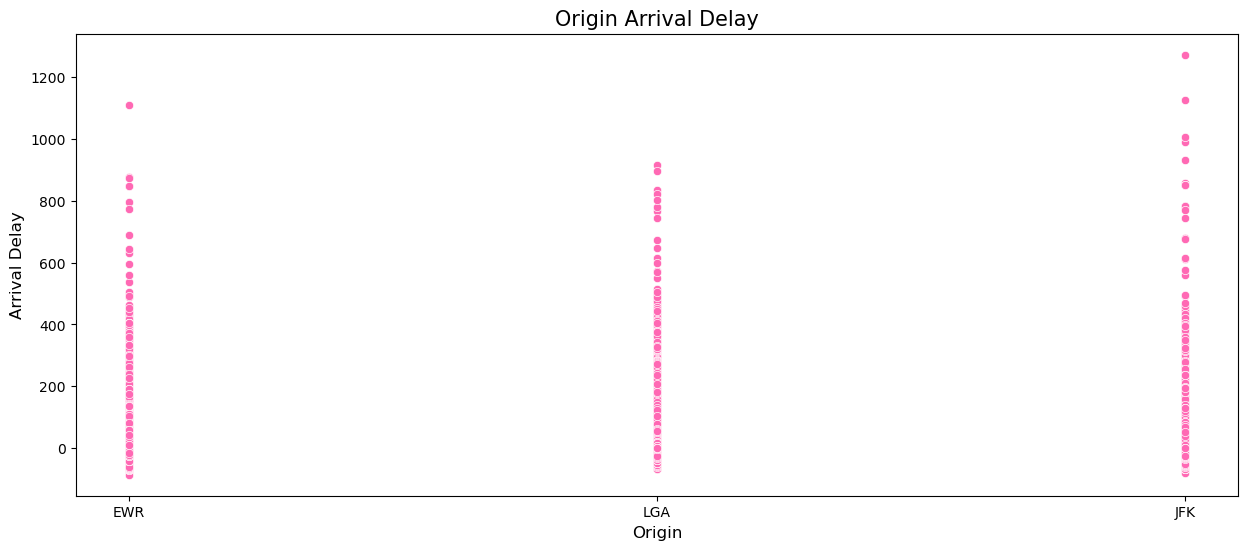

In [51]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=dataset['origin'], y=dataset['arr_delay'], color='#ff69b4')
plt.title('Origin Arrival Delay', fontsize=15)
plt.xlabel('Origin', fontsize=12)
plt.ylabel('Arrival Delay', fontsize=12)
plt.show()

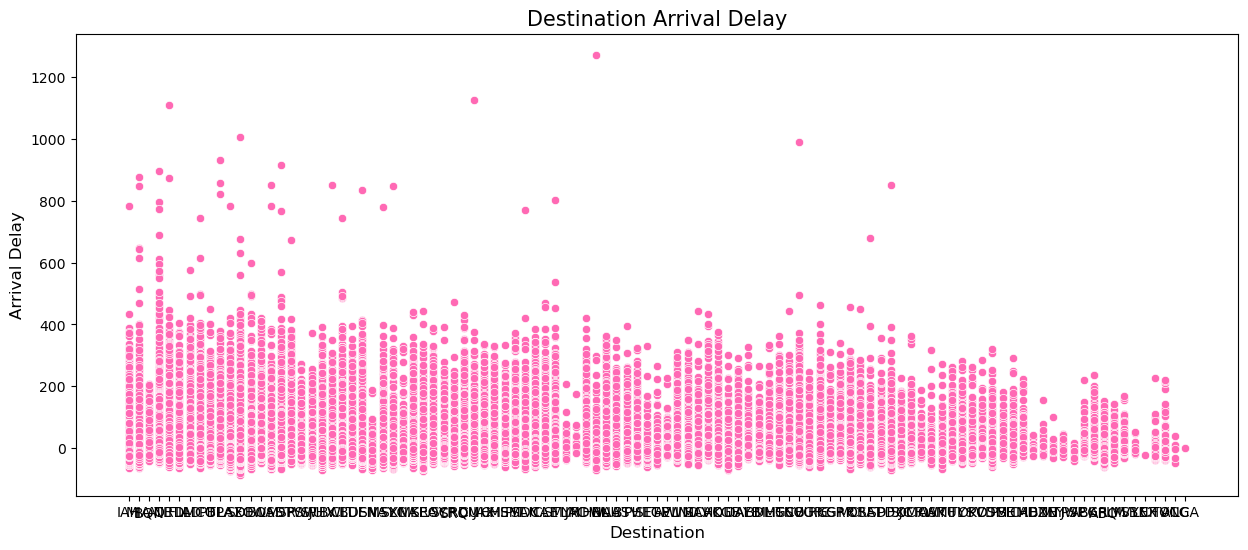

In [52]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=dataset['dest'], y=dataset['arr_delay'], color='#ff69b4')
plt.title('Destination Arrival Delay', fontsize=15)
plt.xlabel('Destination', fontsize=12)
plt.ylabel('Arrival Delay', fontsize=12)
plt.show()

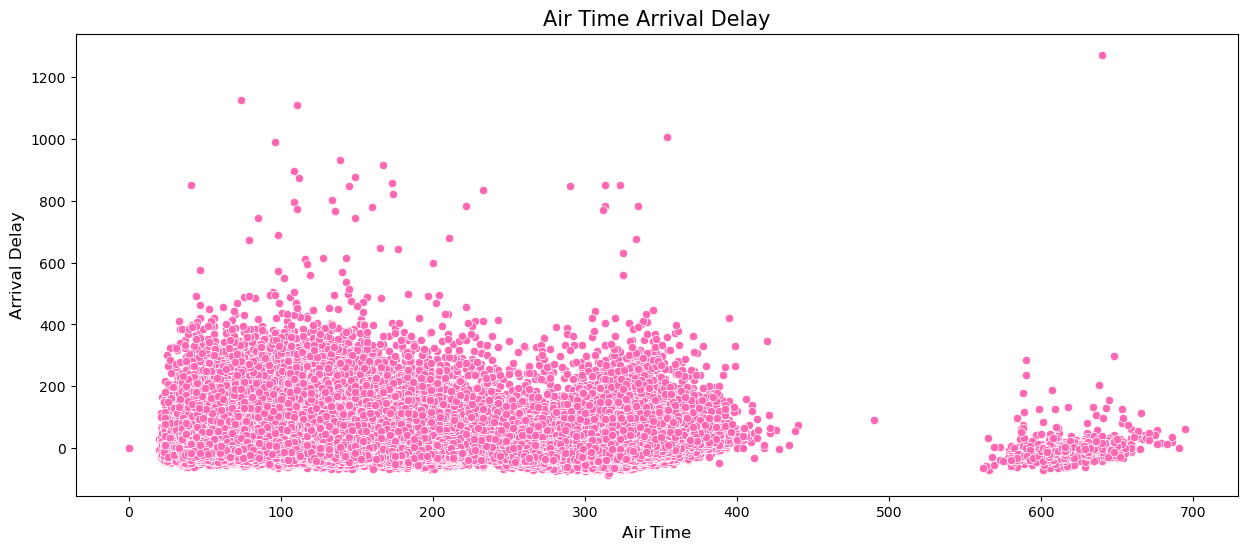

In [53]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=dataset['air_time'], y=dataset['arr_delay'], color='#ff69b4')
plt.title('Air Time Arrival Delay', fontsize=15)
plt.xlabel('Air Time', fontsize=12)
plt.ylabel('Arrival Delay', fontsize=12)
plt.show()

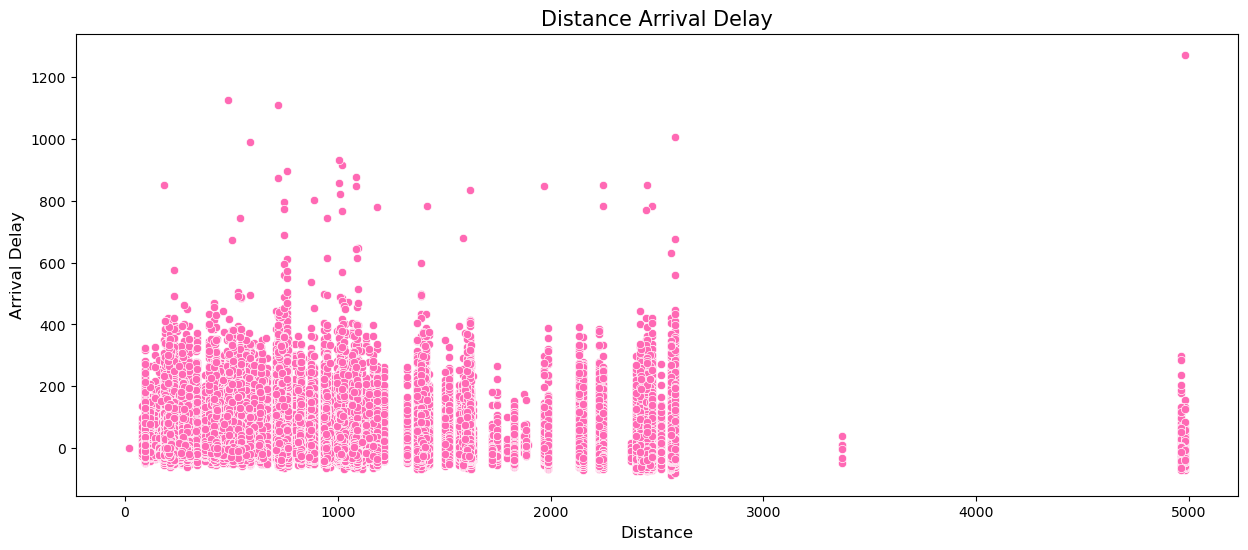

In [54]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=dataset['distance'], y=dataset['arr_delay'], color='#ff69b4')
plt.title('Distance Arrival Delay', fontsize=15)
plt.xlabel('Distance', fontsize=12)
plt.ylabel('Arrival Delay', fontsize=12)
plt.show()

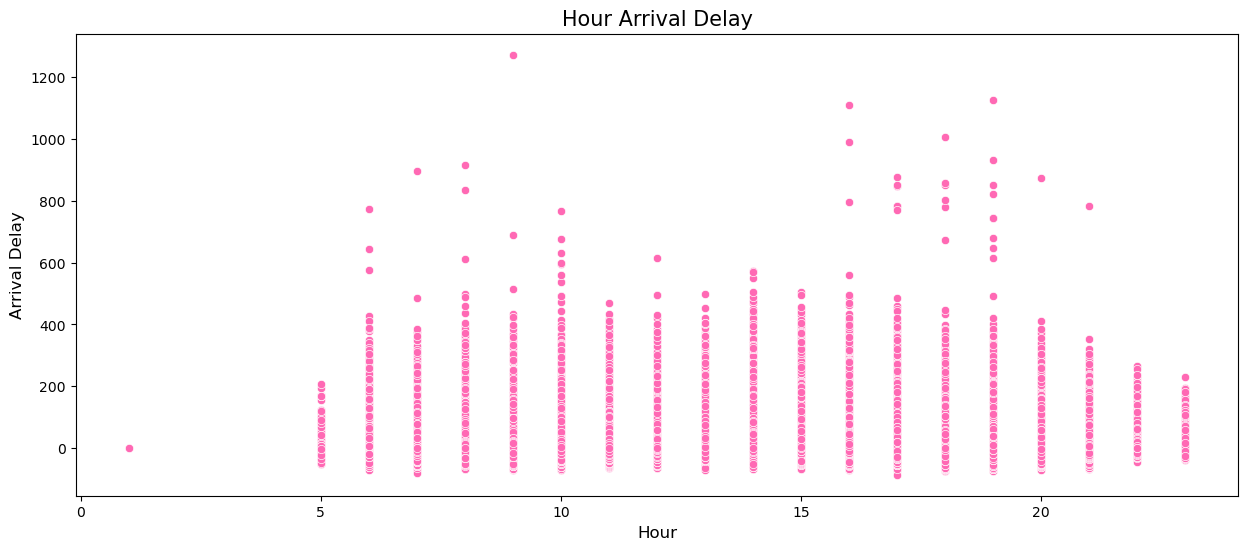

In [55]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=dataset['hour'], y=dataset['arr_delay'], color='#ff69b4')
plt.title('Hour Arrival Delay', fontsize=15)
plt.xlabel('Hour', fontsize=12)
plt.ylabel('Arrival Delay', fontsize=12)
plt.show()

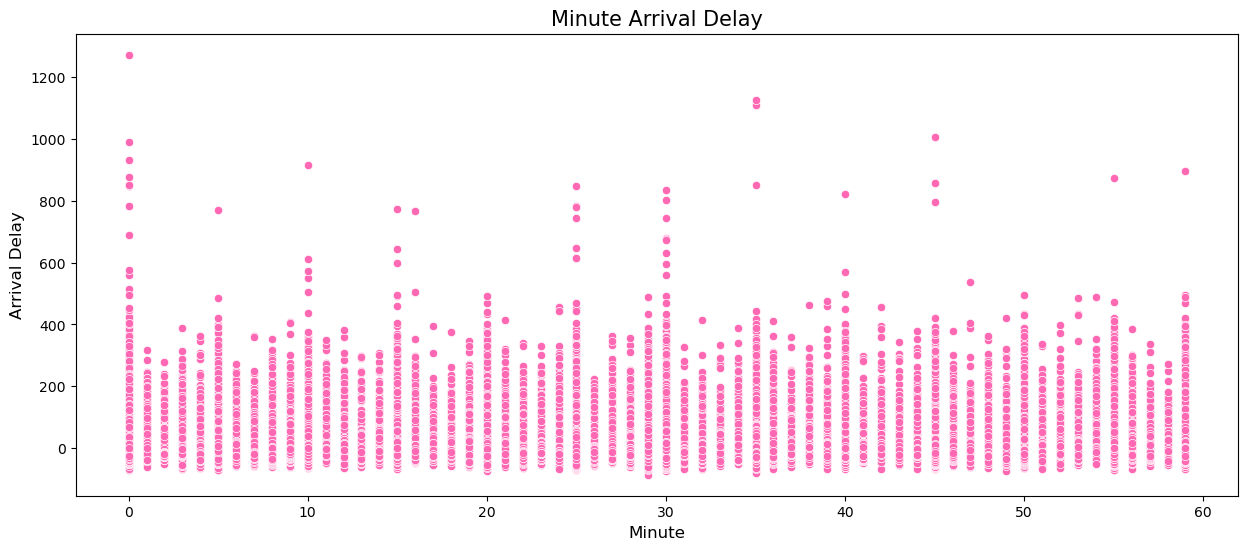

In [56]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=dataset['minute'], y=dataset['arr_delay'], color='#ff69b4')
plt.title('Minute Arrival Delay', fontsize=15)
plt.xlabel('Minute', fontsize=12)
plt.ylabel('Arrival Delay', fontsize=12)
plt.show()

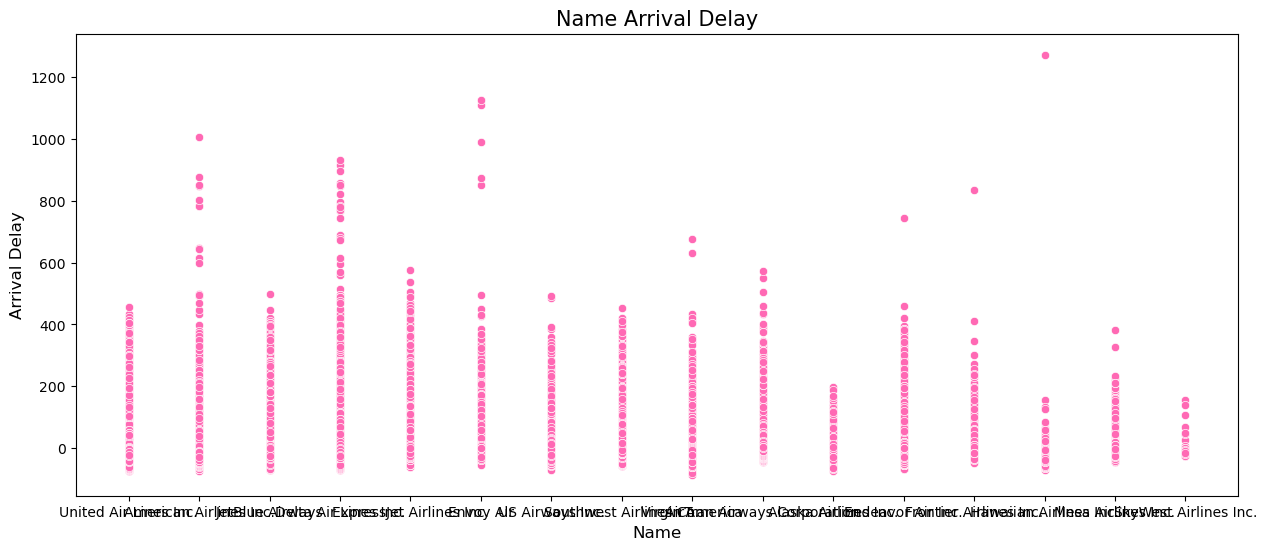

In [57]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x=dataset['name'], y=dataset['arr_delay'], color='#ff69b4')
plt.title('Name Arrival Delay', fontsize=15)
plt.xlabel('Name', fontsize=12)
plt.ylabel('Arrival Delay', fontsize=12)
plt.show()

Berdasarkan penyajian data di atas, dapat ditarik kesimpulan sebagai berikut :
1. Rata-rata keterlambatan kedatangan tertinggi terjadi pada bulan Juli dan terendah pada bulan September.
2. Berdasarkan hari dalam satu bulan, rata-rata keterlambatan kedatangan tertinggi terjadi pada tanggal 8 dan terendah pada tanggal 4 dan 6. 
3. Kode maskapai penerbangan yang sering mengalami keterlambatan kedatangan yaitu F9 dan yang paling jarang adalah AS.
4. Bandara keberangkatan yang paling sering menyebabkan keterlambatan kedatangan adalah bandara EWR, lalu JFK dan LGA.
5. Destinasi yang paling sering mengalami keterlambatan kedatangan adalah CAE dan yang paling tepat waktu adalah LEX.
6. Nama maskapai yang paling sering mengalami keterlambatan kedatangan adalah Air Trans Airways  Corporation dan yang paling tepat waktu adalah Alaska Airlines Inc.
7. Keterlambatan terdistribusi secara acak di setiap bulannya. Namun, terdapat beberapa bulan yang memiliki perbedaan keterlambatan yang cukup signifikan yaitu pada bulan Januari dan Juli.
8. Keterlambatan kedatangan bervariasi setiap harinya dan hari tidak memiliki dampak yang signifikan terhadap keterlambatan kedatangan.
9. Keterlambatan kedatangan lebih sering dialami penerbangan di sore hari.
10. Terdapat korelasi linier positif yang kuat antara keterlambatan keberangkatan dan keterlambatan kedatangan.
11. Durasi penerbangan tidak memiliki dampak yang signifikan terhadap keterlambatan kedatangan, sama halnya dengan jarak penerbangan.
12. Ringkasan > variabel month, departure time, schedule departure time, departure delay, arrival time, schedule arrival time, carrier, origin, destination, dan hour mempengaruhi variabel arrival delay.

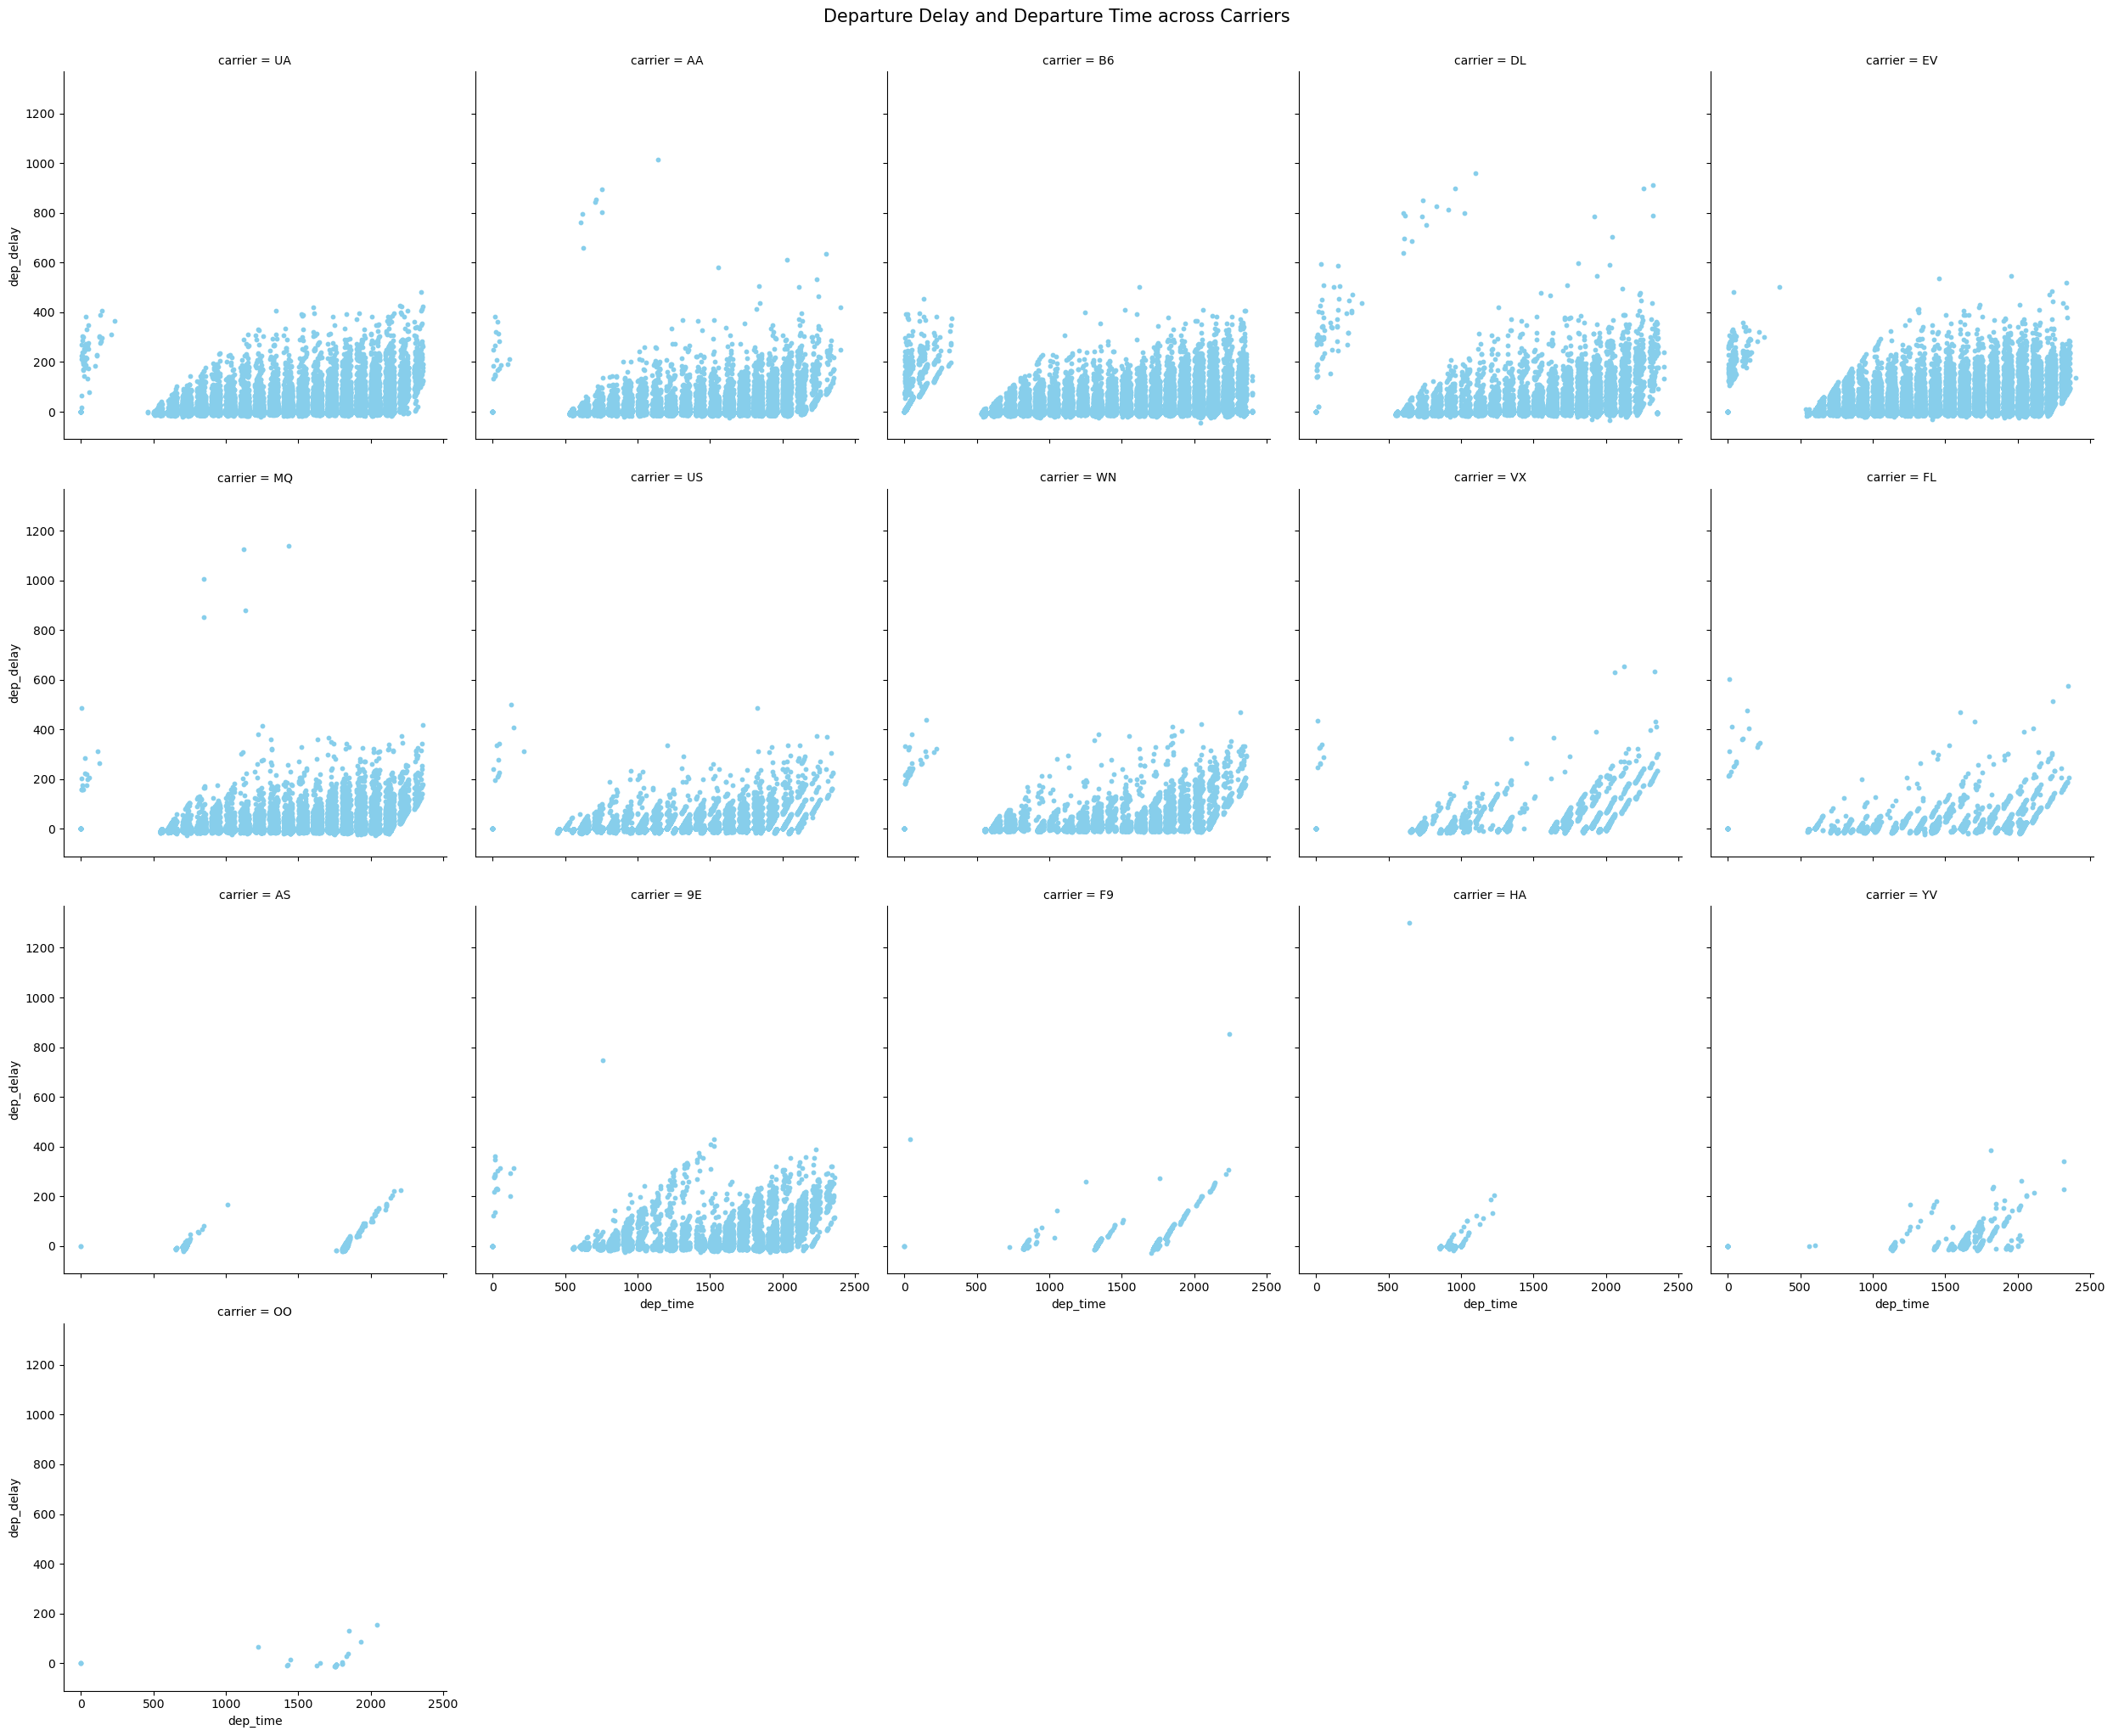

In [58]:
sns.FacetGrid(dataset, col="carrier", col_wrap=5, height=5).map(plt.scatter, "dep_time", "dep_delay", color='#87ceeb', s=10).fig.suptitle('Departure Delay and Departure Time across Carriers', fontsize=15, y=1.02)
plt.show()

Berdasarkan scatter plot di atas, disimpulkan bahwa hubungan antara keterlambatan keberangkatan dan waktu keberangkatan untuk berbagai maskapai dapat menjadi faktor yang signifikan dalam memengaruhi keterlambatan kedatangan.

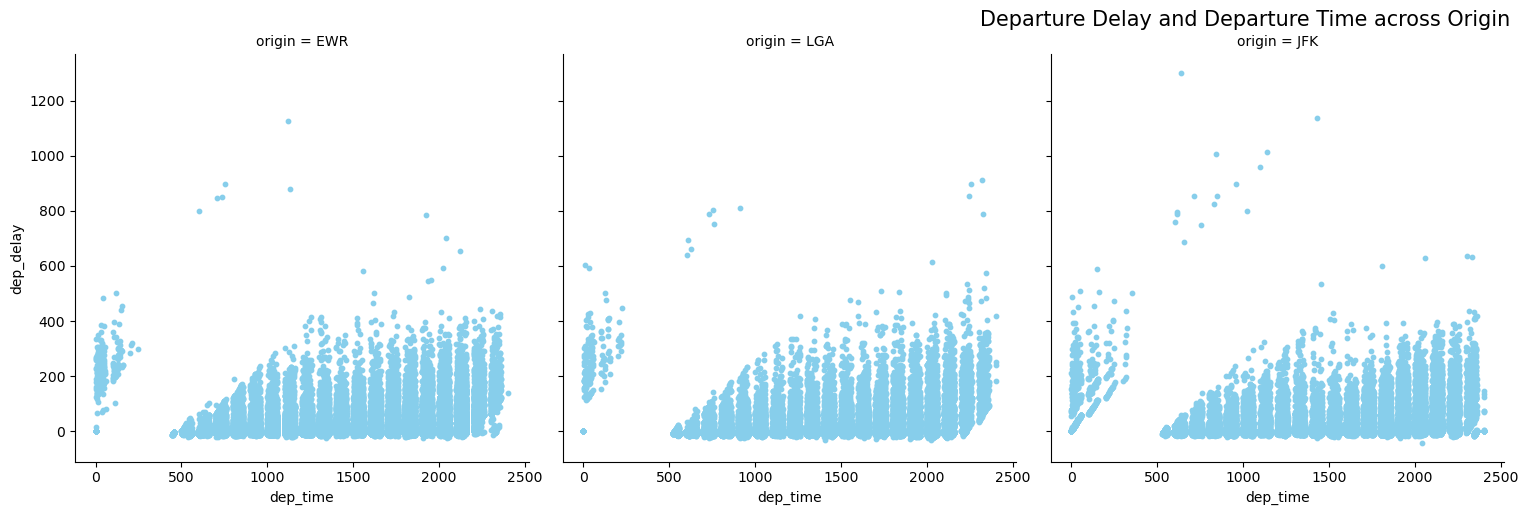

In [59]:
sns.FacetGrid(dataset, col="origin", col_wrap=5, height=5).map(plt.scatter, "dep_time", "dep_delay", color='#87ceeb', s=10).fig.suptitle('Departure Delay and Departure Time across Origin', fontsize=15, y=1.02)
plt.show()

Berdasarkan scatter plot di atas, disimpulkan bahwa hubungan antara bandara asal dan waktu keberangkatan juga dapat menjadi faktor yang signifikan dalam memengaruhi keterlambatan kedatangan.

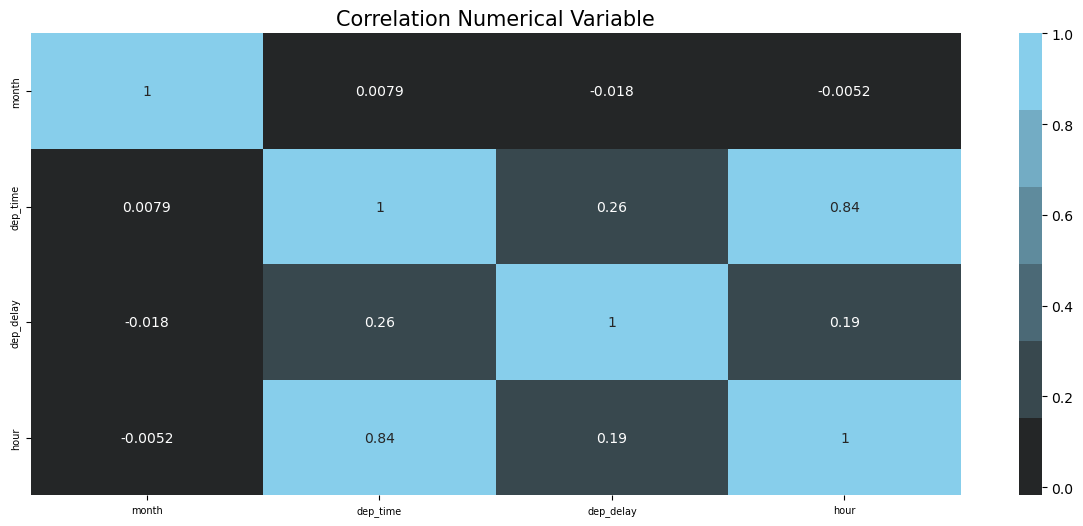

In [60]:
numeric_features = ['month', 'dep_time', 'dep_delay', 'hour']
correlation_matrix = dataset[numeric_features].corr()

colors_multi = sns.dark_palette("#87ceeb", as_cmap=False)
plt.figure(figsize=(15,6))
sns.heatmap(correlation_matrix, annot=True, cmap=colors_multi, annot_kws={"size": 10})
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.title('Correlation Numerical Variable', fontsize=15)
plt.show()

Berdasarkan hasil di atas, ditunjukkan bahwa koefisien korelasi variabel dep_delay dan arr_delay memiliki korelasi positif yang kuat. Sehingga ketika keterlambatan keberangkatan meningkat, keterlambatan kedatangan juga cenderung meningkat. Selanjutnya, variabel month, dep_time, dan hour memiliki korelasi yang lemah dengan variabel arr_delay.